In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#폰트 설정
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['C:\\Windows\\Fonts\\SCHLBKI.TTF',
 'C:\\Windows\\Fonts\\mingliub.ttc',
 'C:\\Windows\\Fonts\\14514.ttf',
 'C:\\Windows\\Fonts\\H2PORL.TTF',
 'C:\\Windows\\Fonts\\PERBI___.TTF',
 'C:\\Windows\\Fonts\\BRLNSR.TTF',
 'C:\\Windows\\Fonts\\13726.ttf',
 'C:\\Windows\\Fonts\\LSANSD.TTF',
 'C:\\Windows\\Fonts\\PALSCRI.TTF',
 'C:\\Windows\\Fonts\\micross.ttf',
 'C:\\Windows\\Fonts\\Candara.ttf',
 'C:\\Windows\\Fonts\\CENSCBK.TTF',
 'C:\\Windows\\Fonts\\segoeui.ttf',
 'C:\\Windows\\Fonts\\REFSAN.TTF',
 'C:\\Windows\\Fonts\\12585.ttf',
 'C:\\Windows\\Fonts\\HYHWPEQ.TTF',
 'C:\\Windows\\Fonts\\13738.ttf',
 'C:\\Windows\\Fonts\\HMFMPYUN.TTF',
 'C:\\Windows\\Fonts\\seguisym.ttf',
 'C:\\Windows\\Fonts\\ELEPHNTI.TTF',
 'C:\\Windows\\Fonts\\13728.ttf',
 'C:\\Windows\\Fonts\\trebuc.ttf',
 'C:\\Windows\\Fonts\\13732.ttf',
 'C:\\Windows\\Fonts\\H2MJSM.TTF',
 'C:\\Windows\\Fonts\\92639.ttf',
 'C:\\Windows\\Fonts\\arialbd.ttf',
 'C:\\Windows\\Fonts\\93777.ttf',
 'C:\\Windows\\Fonts\\13874.ttf',
 'C:\\Windo

In [3]:
import platform 

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [4]:
train_df = pd.read_csv("./train.csv", encoding='cp949')
test_df = pd.read_csv("./test.csv", encoding='cp949')
s_df = pd.read_csv("./sample_submission.csv", encoding='cp949')

In [5]:
train_df

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [6]:
test_df

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10076,60,2020-08-31 20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10077,60,2020-08-31 21,27.9,4.1,68.0,NaN,0.0,1.0,1.0
10078,60,2020-08-31 22,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train_df.columns

Index(['num', 'date_time', '전력사용량(kWh)', '기온(°C)', '풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유'],
      dtype='object')

In [8]:
train_df['date_time'] = pd.to_datetime(train_df['date_time'])
train_df['hour'] = train_df['date_time'].dt.hour
train_df['weekday'] = train_df['date_time'].dt.weekday
train_df['date'] = train_df['date_time'].dt.date
train_df['day'] = train_df['date_time'].dt.day
train_df['month'] = train_df['date_time'].dt.month
train_df['weekend'] = train_df['weekday'].isin([5,6]).astype(int)

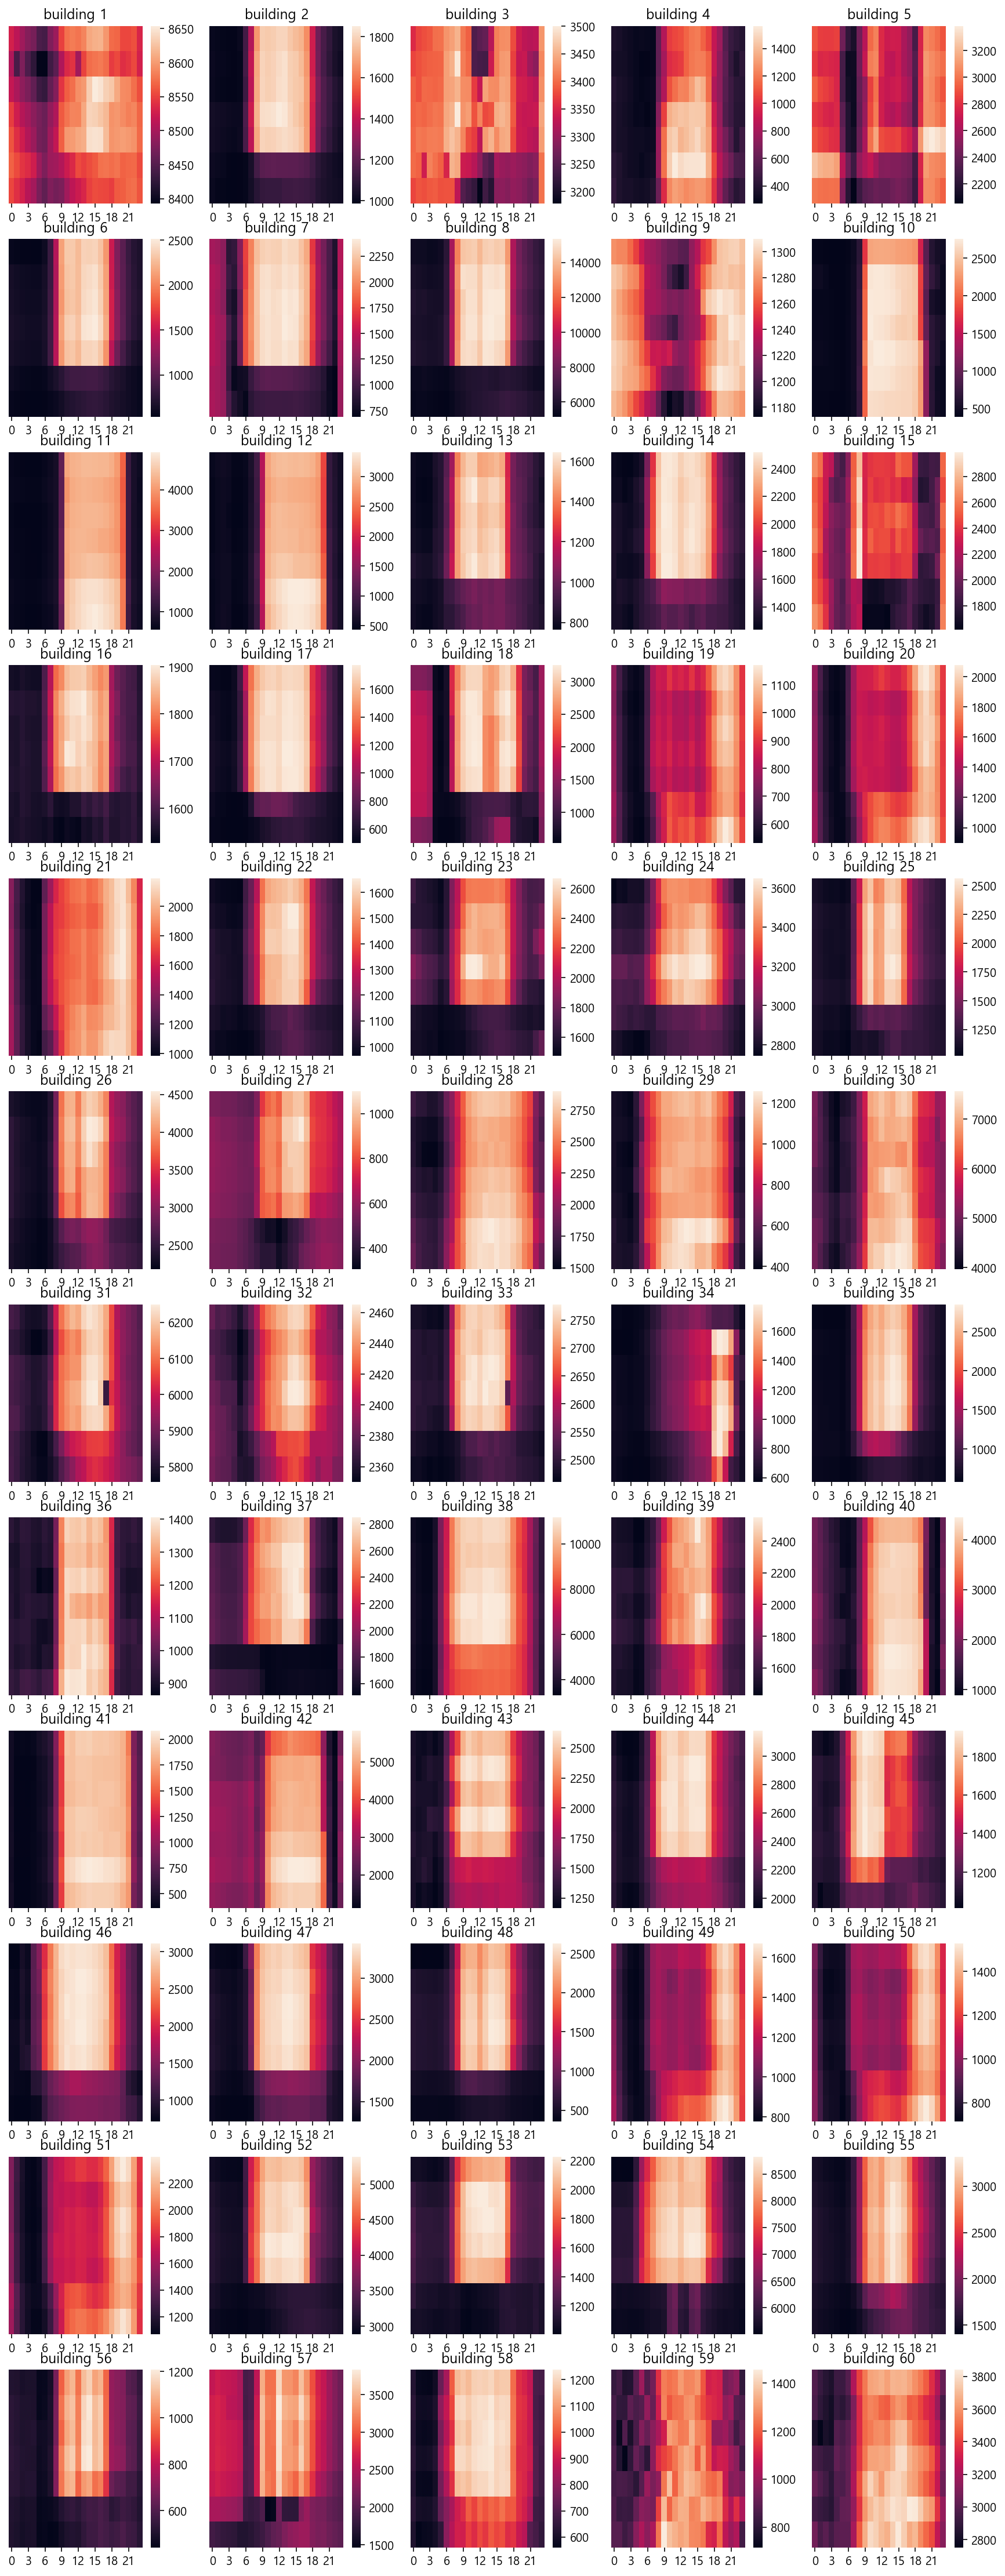

In [9]:
# energy usage of each building ~ weekday, hour
fig = plt.figure(figsize = (15, 40))
for number in train_df['num'].unique():
    df = train_df[train_df.num == number]
    df = df.groupby(['weekday', 'hour'])['전력사용량(kWh)'].mean().reset_index().pivot('weekday', 'hour', '전력사용량(kWh)')
    plt.subplot(12, 5, number)
    sns.heatmap(df)
    plt.title(f'building {number}')
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks([])

- 건물별로 요일별 시간별 사용량에 차이를 보임
- 전력 사용량의 변수가 건물의 위치, 건물의 높이, 건물 크기, 건물 사용 인원 등 많은 변수가 존재할 것이나 모든걸 포함하지 않으므로 있는 변수로 나누어 모델 생성
- 그룹을 짓기위해 군집분석(K-means Cluster) 진행
- 31번, 33번, 57번에서 중간에 이상치가 보이므로 확인이 필요함

In [10]:
num_31 = train_df[train_df['num'] == 31]
num_33 = train_df[train_df['num'] == 33]
num_57 = train_df[train_df['num'] == 57]

<AxesSubplot:xlabel='date_time', ylabel='전력사용량(kWh)'>

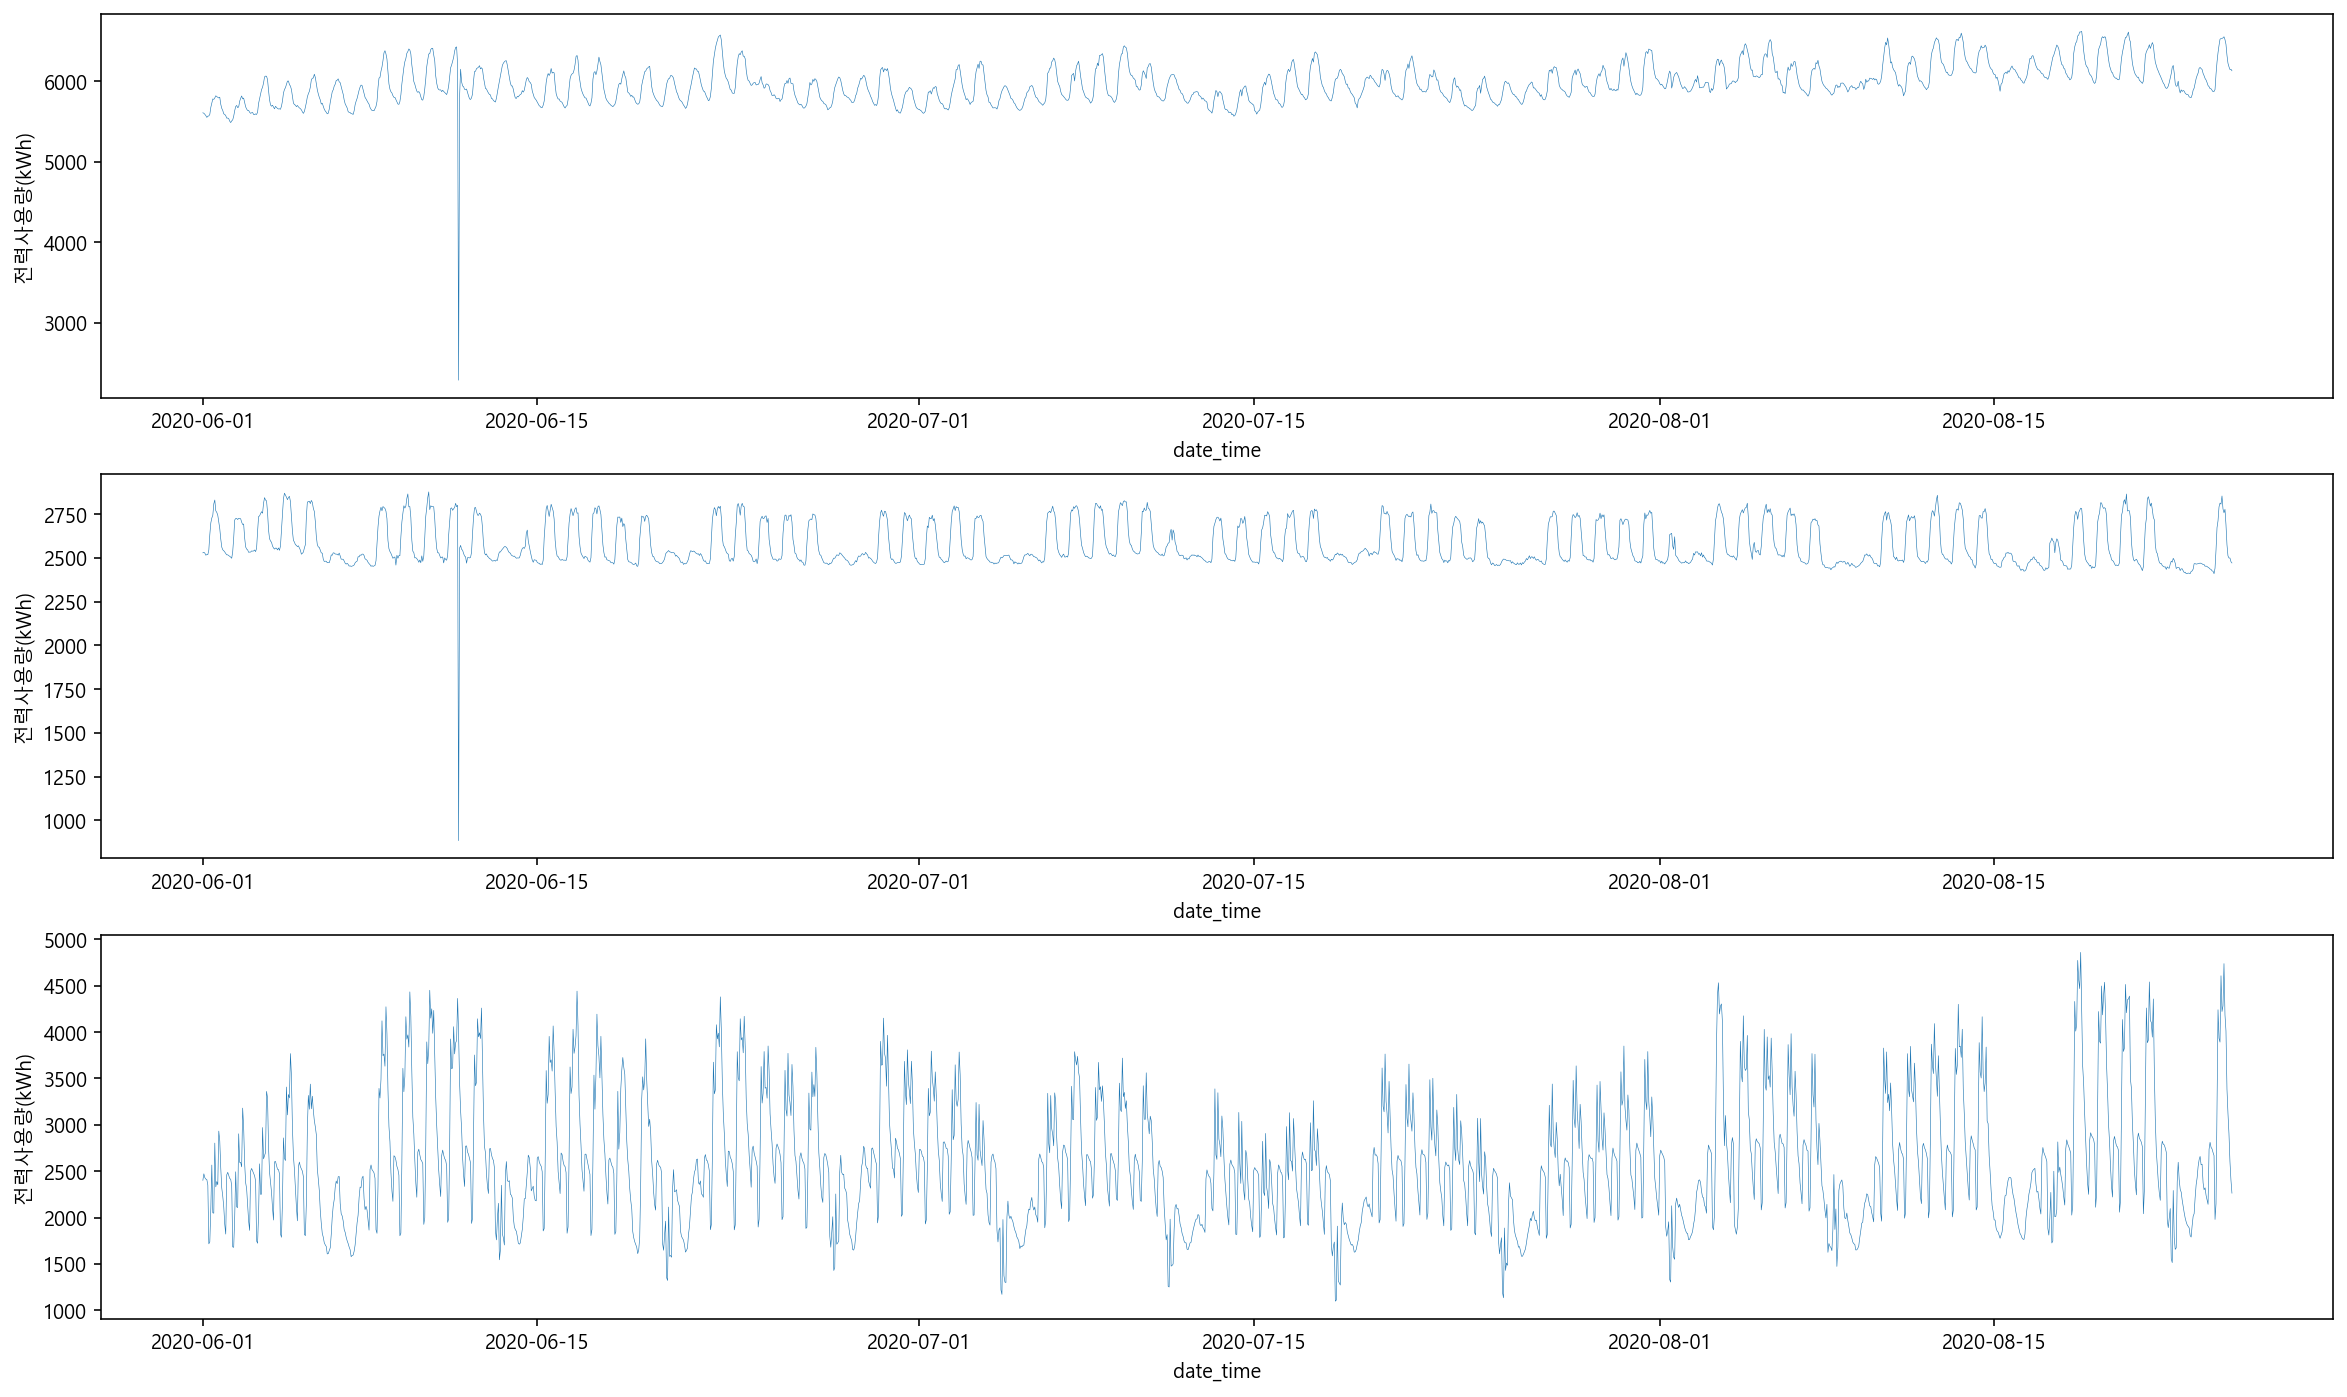

In [11]:
fig = plt.figure(figsize=(20,12))
plt.subplot(3,1,1)
sns.lineplot(data = num_31, x='date_time', y = '전력사용량(kWh)', linewidth=0.3)
plt.subplot(3,1,2)
sns.lineplot(data = num_33, x='date_time', y = '전력사용량(kWh)', linewidth=0.3)
plt.subplot(3,1,3)
sns.lineplot(data = num_57, x='date_time', y = '전력사용량(kWh)', linewidth=0.3)

- 57번의 경우 정상범주에 있었음
- 31,33번의 경우 이상치 발견됨

In [12]:
num_31.loc[(num_31['전력사용량(kWh)'] <=4000)]

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,hour,weekday,date,day,month,weekend
61457,31,2020-06-11 17:00:00,2285.28,31.4,3.2,44.0,0.0,1.0,1.0,0.0,17,3,2020-06-11,11,6,0


In [13]:
num_31.loc[(num_31['전력사용량(kWh)'] <=4000), '전력사용량(kWh)'] = np.nan

C:\Users\KED_Internet\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [14]:
num_33.loc[(num_33['전력사용량(kWh)'] <=2000)]

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,hour,weekday,date,day,month,weekend
65537,33,2020-06-11 17:00:00,884.304,30.6,1.3,59.0,0.0,0.8,1.0,0.0,17,3,2020-06-11,11,6,0


In [15]:
num_33.loc[(num_33['전력사용량(kWh)'] <=2000), '전력사용량(kWh)'] = np.nan

C:\Users\KED_Internet\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [16]:
# 이상치 대체
num31 = num_31.interpolate()
num33 = num_33.interpolate()

<AxesSubplot:xlabel='date_time', ylabel='전력사용량(kWh)'>

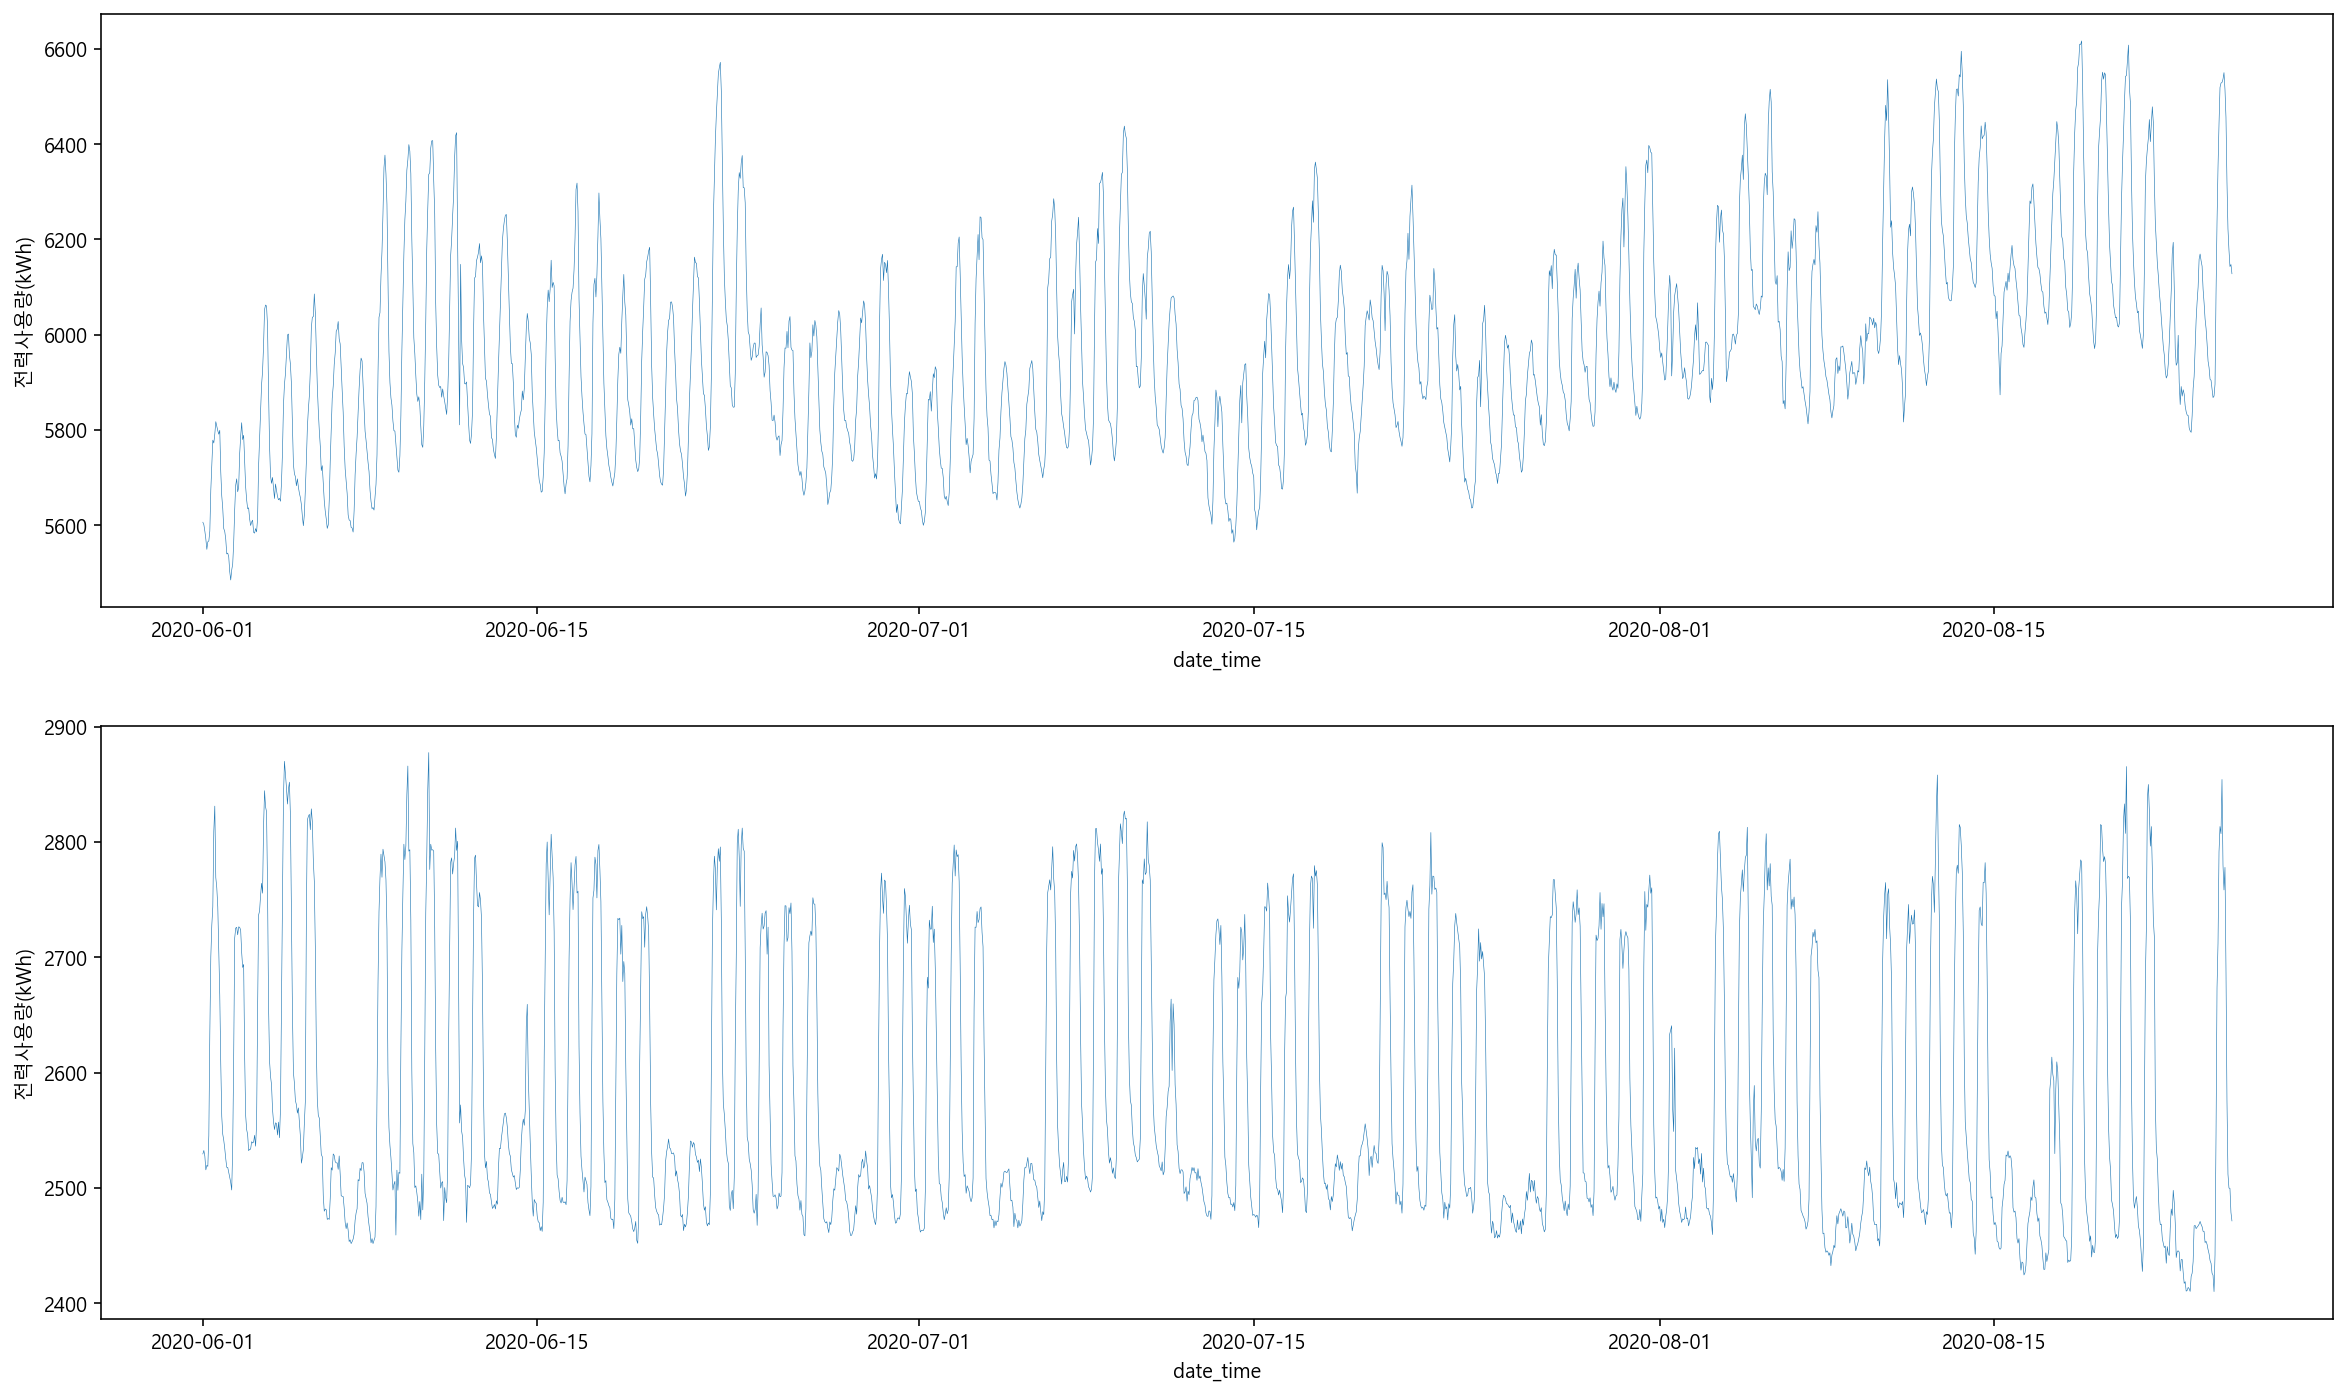

In [17]:
fig = plt.figure(figsize=(20,12))
plt.subplot(2,1,1)
sns.lineplot(data = num31, x='date_time', y = '전력사용량(kWh)', linewidth=0.3)
plt.subplot(2,1,2)
sns.lineplot(data = num33, x='date_time', y = '전력사용량(kWh)', linewidth=0.3)

In [18]:
num31.loc[61457,]

num                            31
date_time     2020-06-11 17:00:00
전력사용량(kWh)                6005.23
기온(°C)                       31.4
풍속(m/s)                       3.2
습도(%)                          44
강수량(mm)                         0
일조(hr)                          1
비전기냉방설비운영                       1
태양광보유                           0
hour                           17
weekday                         3
date                   2020-06-11
day                            11
month                           6
weekend                         0
Name: 61457, dtype: object

In [19]:
num33.loc[65537,]

num                            33
date_time     2020-06-11 17:00:00
전력사용량(kWh)                 2678.4
기온(°C)                       30.6
풍속(m/s)                       1.3
습도(%)                          59
강수량(mm)                         0
일조(hr)                        0.8
비전기냉방설비운영                       1
태양광보유                           0
hour                           17
weekday                         3
date                   2020-06-11
day                            11
month                           6
weekend                         0
Name: 65537, dtype: object

In [20]:
train_df.loc[61457,'전력사용량(kWh)'] = num31.loc[61457,'전력사용량(kWh)']
train_df.loc[65537,'전력사용량(kWh)'] = num33.loc[65537,'전력사용량(kWh)']

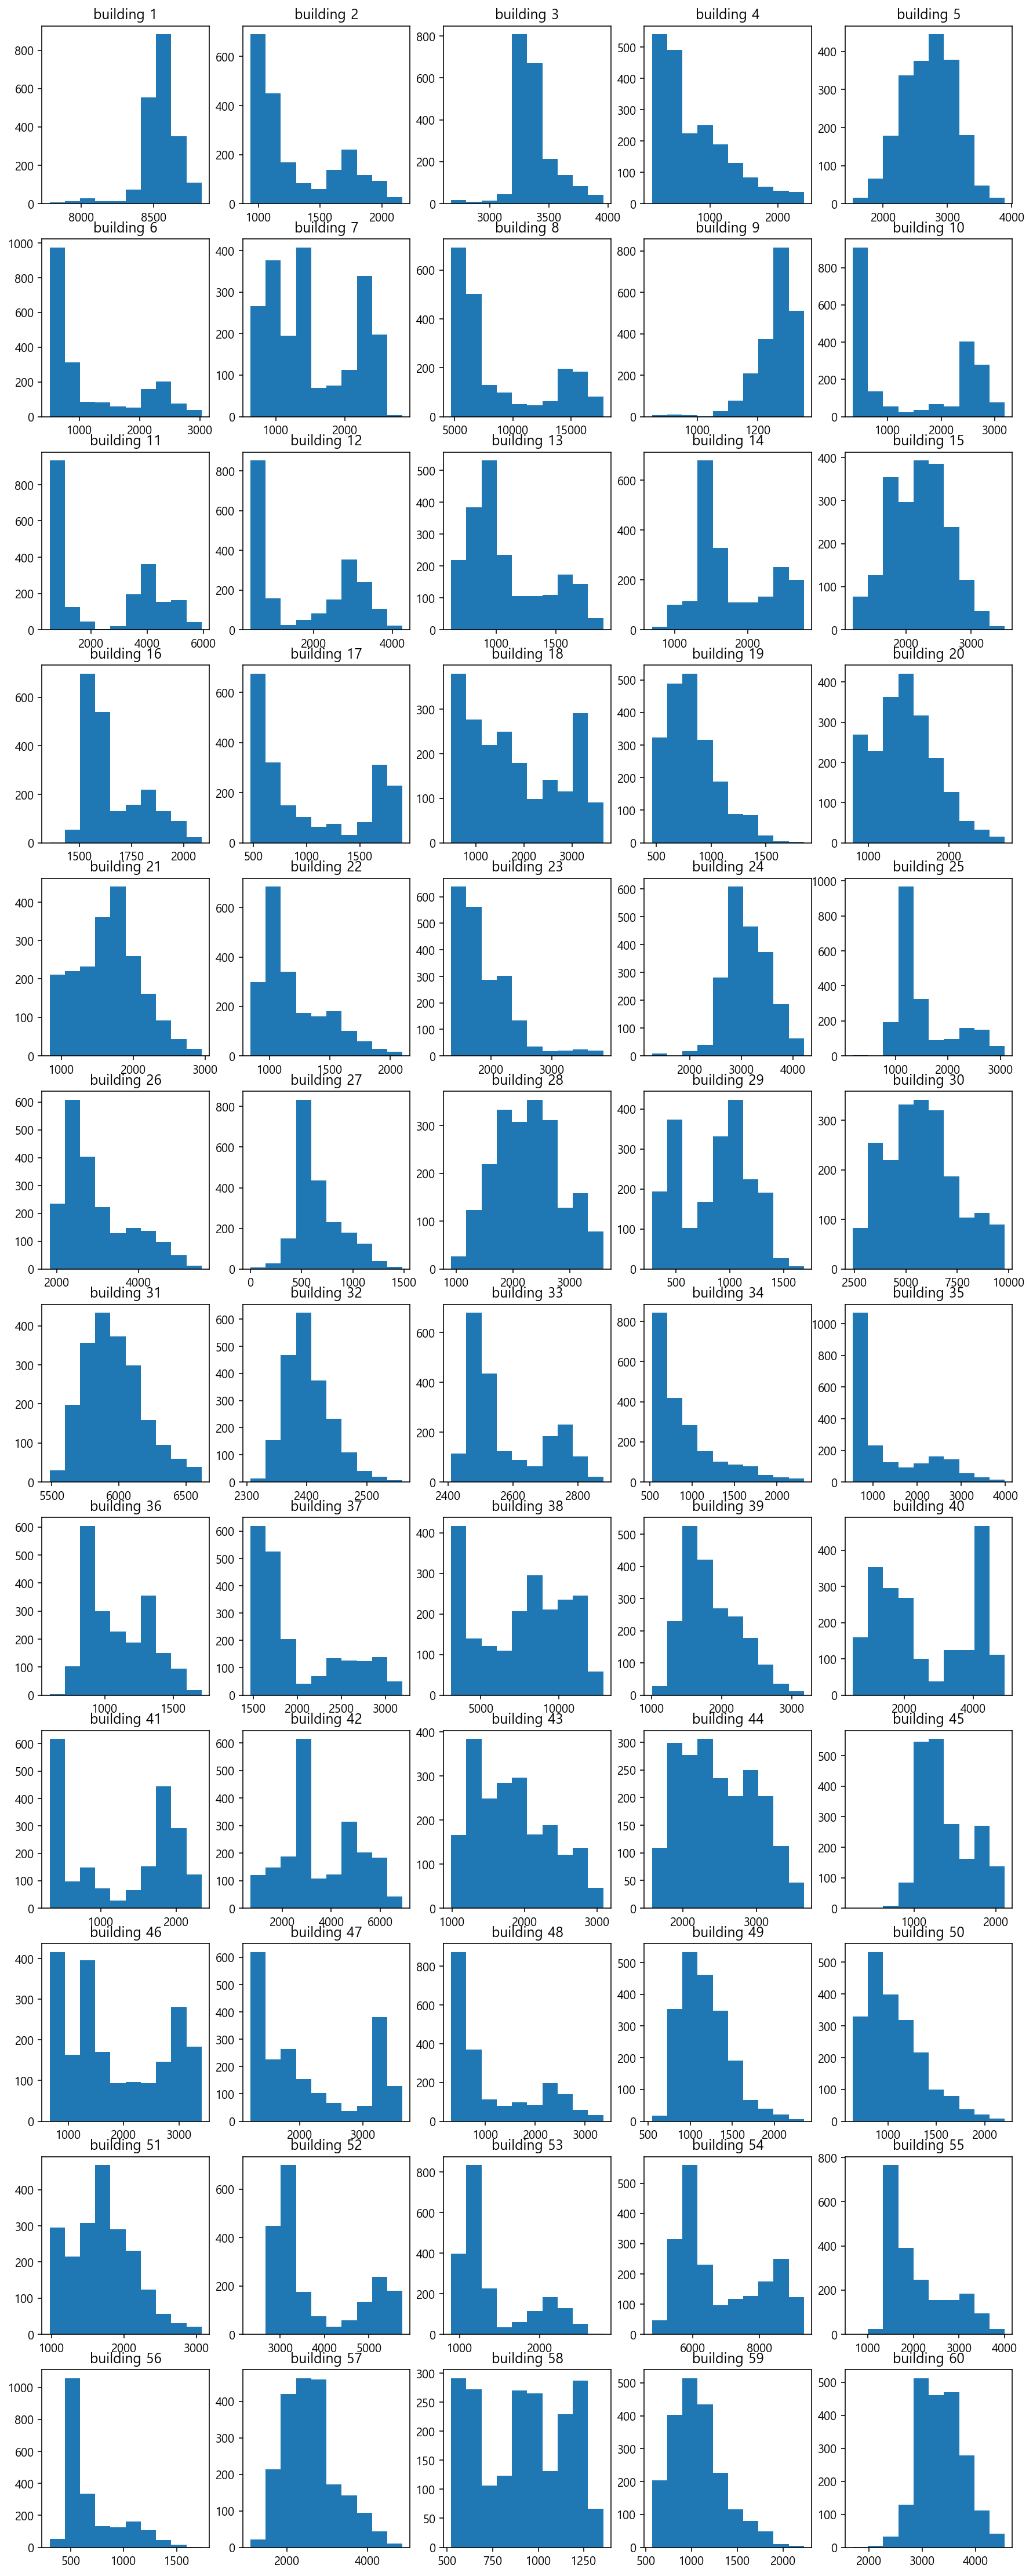

In [21]:
# 
fig = plt.figure(figsize = (15, 40))
for number in train_df['num'].unique():
    df = train_df[train_df.num == number]
    plt.subplot(12, 5, number)
    plt.hist(df['전력사용량(kWh)'])
    plt.title(f'building {number}')
    plt.xlabel('')
    plt.ylabel('')

- 건물별 DataFrame을 생성하고 군집진행예정
- 건물별 데이터의 분포가 모두 각기 다른형태를 띄고 한쪽으로 치우쳐진 분포를 그리는 데이터가 많이 보인다 -> 그룹은 평균값 대신 중앙값 이용

In [22]:
# 건물별 DataFrame 생성
weekday_df = train_df.groupby(['num','weekday'])['전력사용량(kWh)'].median().reset_index().pivot('num','weekday','전력사용량(kWh)').reset_index()
weekday_df

weekday,num,0,1,2,3,4,5,6
0,1,8565.588000,8552.628000,8567.2080,8574.336000,8562.996000,8535.780000,8521.5240
1,2,1261.008000,1304.100000,1303.7760,1318.356000,1300.050000,1074.546000,1056.7260
2,3,3369.363177,3351.834000,3381.4800,3382.668000,3374.500282,3260.736000,3250.8000
3,4,538.488000,547.992000,554.2560,582.984000,612.360000,602.640000,608.2560
4,5,2761.992000,2732.184000,2730.2400,2650.752000,2880.792000,2747.736000,2585.9520
5,6,1062.450000,1064.880000,1112.1300,1108.620000,998.460000,671.760000,629.9100
6,7,1605.420000,1737.166500,1729.2690,1749.195000,1732.001737,1019.061000,945.6345
7,8,7938.072844,8774.302500,8642.0880,8752.990500,8292.098871,5730.700500,5809.0905
8,9,1262.898000,1279.908000,1279.8000,1277.856000,1275.480000,1278.342000,1252.6380
9,10,652.328429,904.608000,837.5400,935.388000,1151.010000,991.278000,938.6280


In [23]:
hour_df = train_df.groupby(['num','hour'])['전력사용량(kWh)'].median().reset_index().pivot('num','hour','전력사용량(kWh)').reset_index()
hour_df = hour_df.drop(['num'],axis=1)

In [24]:
f_df = pd.concat([weekday_df,hour_df], axis=1)
f_df

,num,0,1,2,3,4,5,6,0,1,...,14,15,16,17,18,19,20,21,22,23
0,1,8565.588000,8552.628000,8567.2080,8574.336000,8562.996000,8535.780000,8521.5240,8546.472,8526.384,...,8600.256000,8607.384,8606.088000,8598.960,8576.2800,8586.000,8573.688000,8577.57600,8577.576,8558.784
1,2,1261.008000,1304.100000,1303.7760,1318.356000,1300.050000,1074.546000,1056.7260,1008.288,1001.160,...,1707.480000,1697.112,1693.224000,1622.268,1367.2800,1204.956,1124.604000,1078.92000,1039.068,1021.248
2,3,3369.363177,3351.834000,3381.4800,3382.668000,3374.500282,3260.736000,3250.8000,3274.884,3272.400,...,3388.338000,3385.152,3406.212000,3394.872,3334.1760,3295.512,3290.760000,3283.52400,3283.740,3327.588
3,4,538.488000,547.992000,554.2560,582.984000,612.360000,602.640000,608.2560,372.816,355.104,...,1294.704000,1288.224,1236.384000,1121.472,917.5680,748.224,566.352000,479.52000,405.216,422.496
4,5,2761.992000,2732.184000,2730.2400,2650.752000,2880.792000,2747.736000,2585.9520,2999.808,2920.320,...,2630.880000,2667.600,2584.224000,2552.256,2344.8960,2788.992,3132.000000,3111.69600,3091.824,3013.200
5,6,1062.450000,1064.880000,1112.1300,1108.620000,998.460000,671.760000,629.9100,636.660,607.500,...,2302.020000,2327.940,2210.220000,2017.440,1440.7200,1119.960,940.680000,799.20000,714.960,667.980
6,7,1605.420000,1737.166500,1729.2690,1749.195000,1732.001737,1019.061000,945.6345,1432.404,1386.639,...,2342.277000,2354.184,2169.112438,2074.572,1699.2180,1381.455,1191.915000,1003.50900,810.486,1422.522
7,8,7938.072844,8774.302500,8642.0880,8752.990500,8292.098871,5730.700500,5809.0905,5731.965,5616.828,...,14762.952000,14470.065,14624.235000,13148.271,8993.5795,7802.226,7082.136000,6596.98200,6208.506,6000.948
8,9,1262.898000,1279.908000,1279.8000,1277.856000,1275.480000,1278.342000,1252.6380,1297.620,1289.952,...,1223.100000,1243.512,1264.248000,1281.096,1293.4080,1304.640,1304.100000,1306.47600,1304.964,1300.644
9,10,652.328429,904.608000,837.5400,935.388000,1151.010000,991.278000,938.6280,423.468,420.228,...,2604.312000,2593.296,2566.080000,2558.952,2506.1400,1906.740,1047.816000,606.52800,484.704,444.852


In [25]:
qq = ['Mon','Tues','Wed','Thur','Fri','Sat','Sun']

In [26]:
col = ['num'] + [str(i) for i in qq] + ['hour' + str(j) for j in range(24)]

In [27]:
f_df.columns = col

In [28]:
f_df

,num,Mon,Tues,Wed,Thur,Fri,Sat,Sun,hour0,hour1,...,hour14,hour15,hour16,hour17,hour18,hour19,hour20,hour21,hour22,hour23
0,1,8565.588000,8552.628000,8567.2080,8574.336000,8562.996000,8535.780000,8521.5240,8546.472,8526.384,...,8600.256000,8607.384,8606.088000,8598.960,8576.2800,8586.000,8573.688000,8577.57600,8577.576,8558.784
1,2,1261.008000,1304.100000,1303.7760,1318.356000,1300.050000,1074.546000,1056.7260,1008.288,1001.160,...,1707.480000,1697.112,1693.224000,1622.268,1367.2800,1204.956,1124.604000,1078.92000,1039.068,1021.248
2,3,3369.363177,3351.834000,3381.4800,3382.668000,3374.500282,3260.736000,3250.8000,3274.884,3272.400,...,3388.338000,3385.152,3406.212000,3394.872,3334.1760,3295.512,3290.760000,3283.52400,3283.740,3327.588
3,4,538.488000,547.992000,554.2560,582.984000,612.360000,602.640000,608.2560,372.816,355.104,...,1294.704000,1288.224,1236.384000,1121.472,917.5680,748.224,566.352000,479.52000,405.216,422.496
4,5,2761.992000,2732.184000,2730.2400,2650.752000,2880.792000,2747.736000,2585.9520,2999.808,2920.320,...,2630.880000,2667.600,2584.224000,2552.256,2344.8960,2788.992,3132.000000,3111.69600,3091.824,3013.200
5,6,1062.450000,1064.880000,1112.1300,1108.620000,998.460000,671.760000,629.9100,636.660,607.500,...,2302.020000,2327.940,2210.220000,2017.440,1440.7200,1119.960,940.680000,799.20000,714.960,667.980
6,7,1605.420000,1737.166500,1729.2690,1749.195000,1732.001737,1019.061000,945.6345,1432.404,1386.639,...,2342.277000,2354.184,2169.112438,2074.572,1699.2180,1381.455,1191.915000,1003.50900,810.486,1422.522
7,8,7938.072844,8774.302500,8642.0880,8752.990500,8292.098871,5730.700500,5809.0905,5731.965,5616.828,...,14762.952000,14470.065,14624.235000,13148.271,8993.5795,7802.226,7082.136000,6596.98200,6208.506,6000.948
8,9,1262.898000,1279.908000,1279.8000,1277.856000,1275.480000,1278.342000,1252.6380,1297.620,1289.952,...,1223.100000,1243.512,1264.248000,1281.096,1293.4080,1304.640,1304.100000,1306.47600,1304.964,1300.644
9,10,652.328429,904.608000,837.5400,935.388000,1151.010000,991.278000,938.6280,423.468,420.228,...,2604.312000,2593.296,2566.080000,2558.952,2506.1400,1906.740,1047.816000,606.52800,484.704,444.852


In [29]:
# 요일과 시간에 따라 군집을 나눌것이므로 그에 합당한 정규화과정 진행
for i in range(len(f_df)):
    f_df.iloc[i,1:8] = (f_df.iloc[i,1:8] - f_df.iloc[i,1:8].mean())/f_df.iloc[i,1:8].std()
    f_df.iloc[i,8:] = (f_df.iloc[i,8:] - f_df.iloc[i,8:].mean())/f_df.iloc[i,8:].std()

In [30]:
f_df

,num,Mon,Tues,Wed,Thur,Fri,Sat,Sun,hour0,hour1,...,hour14,hour15,hour16,hour17,hour18,hour19,hour20,hour21,hour22,hour23
0,1,0.590985,-0.087195,0.675757,1.048756,0.455349,-0.968828,-1.714825,-0.054554,-0.495728,...,1.126655,1.283201,1.254738,1.098192,0.600092,0.813564,0.543166,0.628555,0.628555,0.215843
1,2,0.259920,0.635967,0.633139,0.760373,0.600624,-1.367257,-1.522765,-1.031987,-1.053854,...,1.112910,1.081104,1.069177,0.851507,0.069285,-0.428673,-0.675167,-0.815311,-0.937564,-0.992230
2,3,0.530408,0.226509,0.740475,0.761071,0.619469,-1.352837,-1.525096,-1.199306,-1.253455,...,1.273898,1.204446,1.663537,1.416334,0.093211,-0.749632,-0.853222,-1.010961,-1.006252,-0.050402
3,4,-1.280487,-0.973568,-0.771281,0.156449,1.105105,0.791211,0.972572,-0.904856,-0.950505,...,1.471105,1.454404,1.320798,1.024638,0.499121,0.062674,-0.406060,-0.629851,-0.821353,-0.776817
4,5,0.378345,0.055196,0.034121,-0.827608,1.666255,0.223795,-1.530104,0.966190,0.691945,...,-0.306662,-0.179973,-0.467631,-0.577925,-1.293345,0.238846,1.422270,1.352218,1.283657,1.012394
5,6,0.541930,0.553614,0.780809,0.763932,0.234243,-1.336649,-1.537878,-0.949362,-0.989268,...,1.329698,1.365170,1.204069,0.940248,0.151001,-0.287962,-0.533308,-0.726925,-0.842208,-0.906500
6,7,0.286375,0.653087,0.631105,0.686568,0.638711,-1.345733,-1.550113,-0.462087,-0.541157,...,1.109933,1.130505,0.810750,0.647409,-0.001103,-0.550113,-0.877588,-1.203104,-1.536597,-0.479161
7,8,0.171590,0.788874,0.691276,0.773142,0.432923,-1.457836,-1.399970,-1.001723,-1.030578,...,1.261556,1.188155,1.226792,0.856896,-0.184322,-0.482890,-0.663354,-0.784939,-0.882296,-0.934313
8,9,-0.903196,0.710699,0.700452,0.516007,0.290574,0.562118,-1.876656,0.974633,0.737176,...,-1.333049,-0.700944,-0.058807,0.462930,0.844199,1.192024,1.175301,1.248879,1.202057,1.068278
9,10,-1.740020,-0.074077,-0.516965,0.129180,1.553053,0.498253,0.150576,-0.966709,-0.969864,...,1.156468,1.145744,1.119247,1.112308,1.060892,0.477342,-0.358870,-0.788490,-0.907093,-0.945891


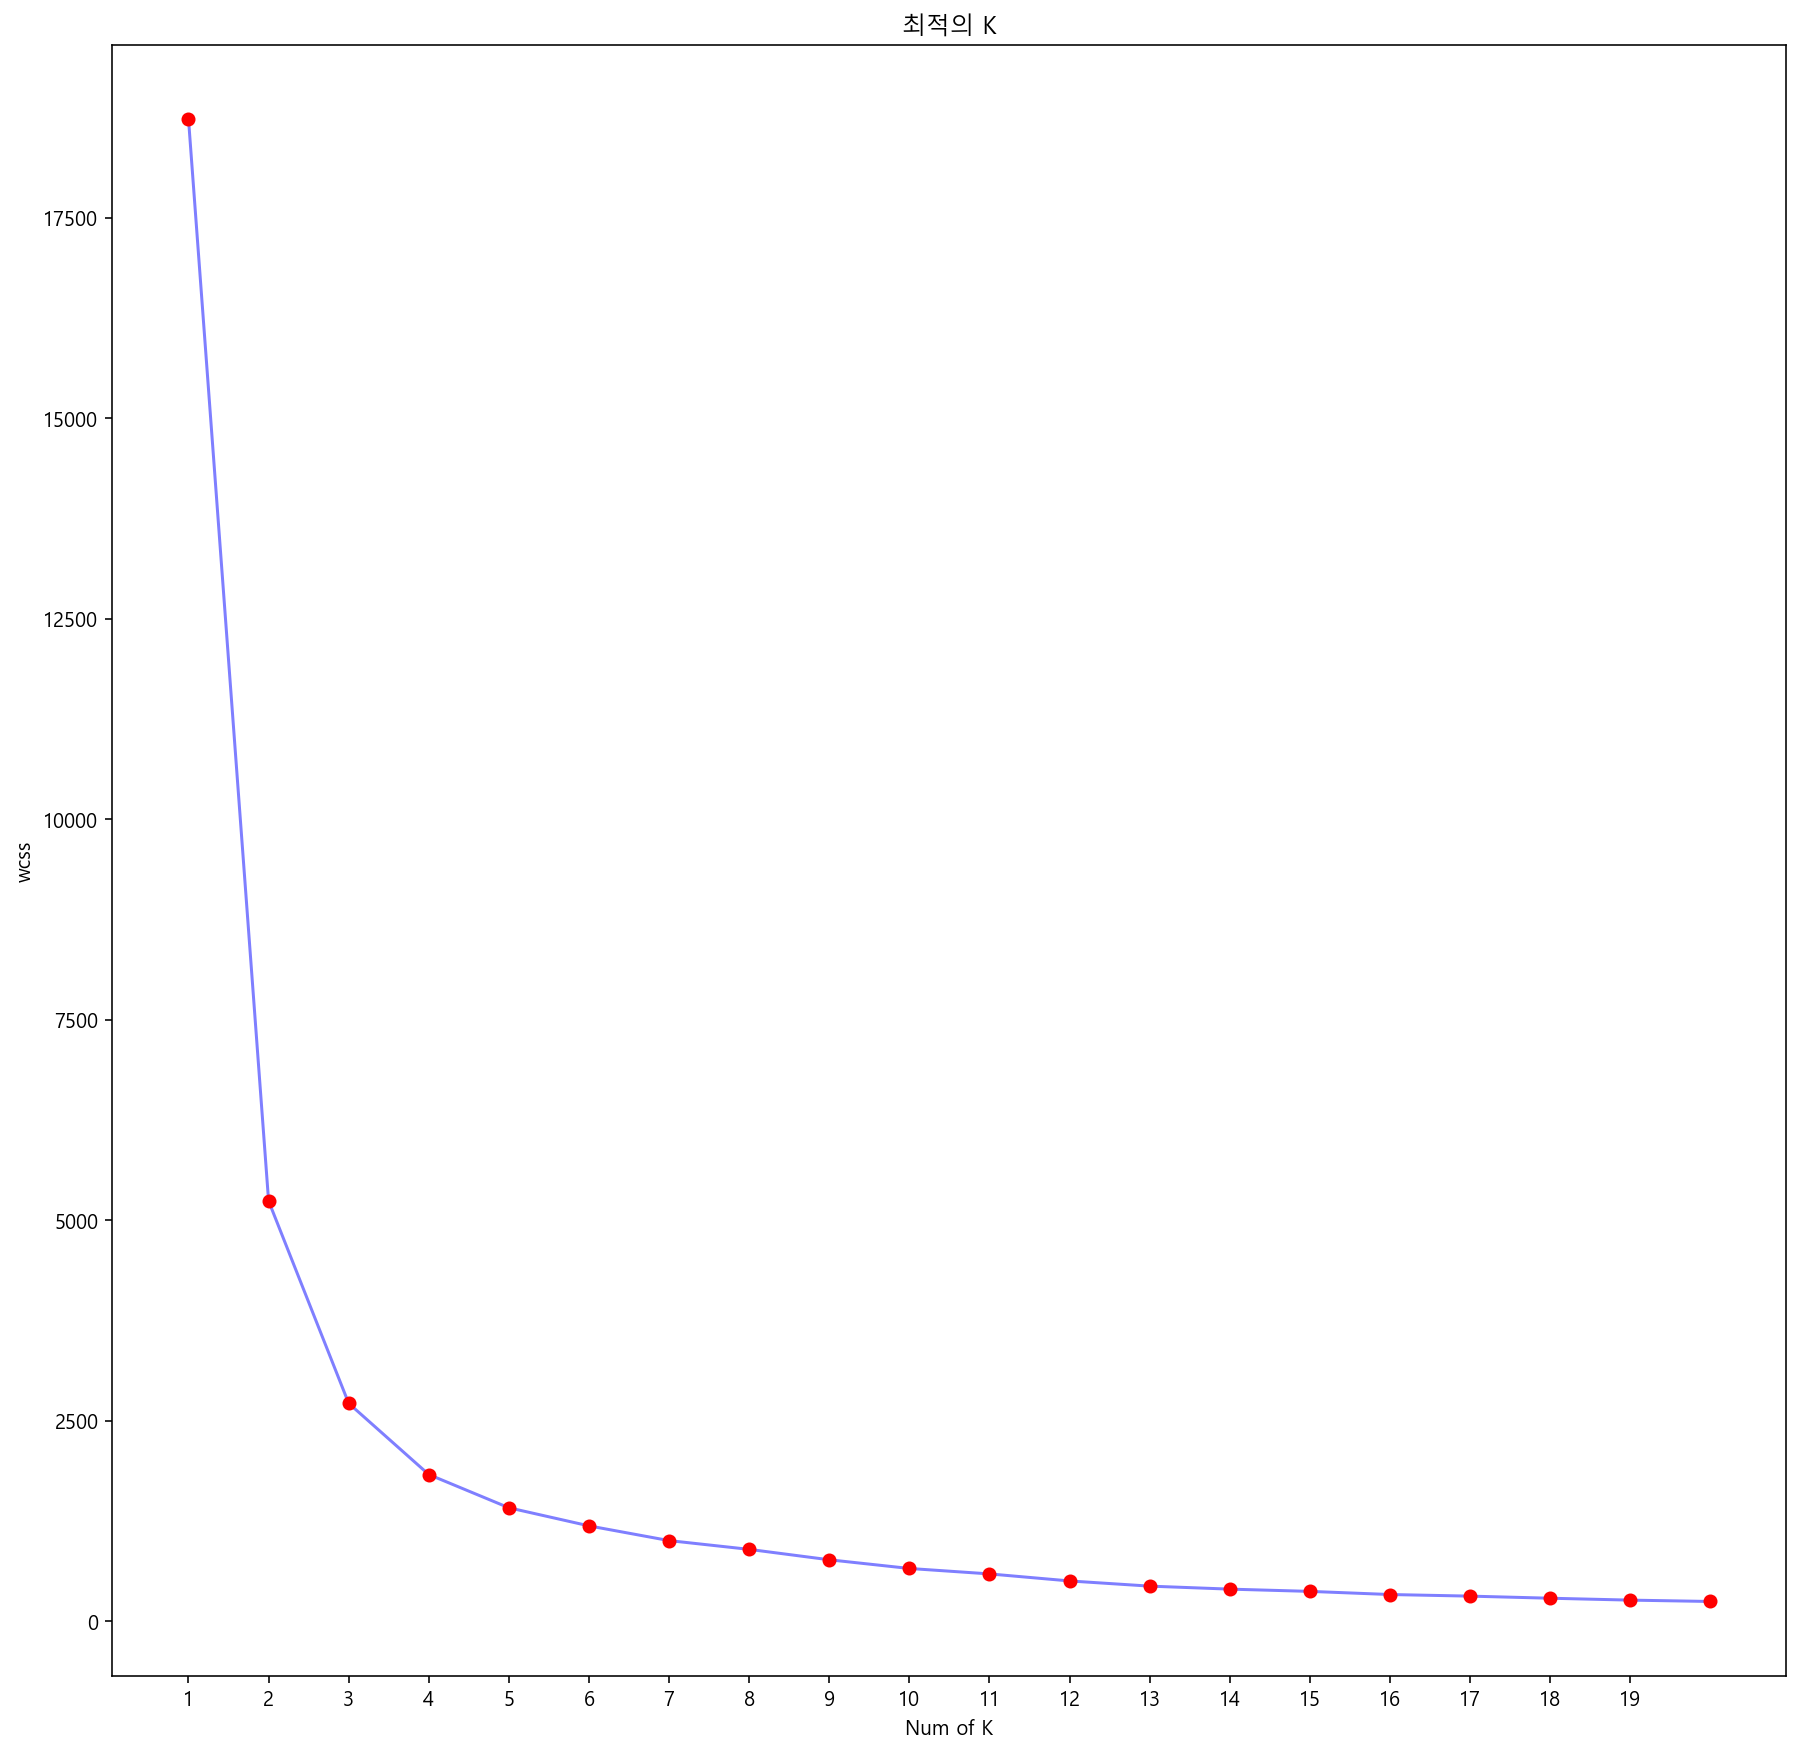

In [31]:
from sklearn.cluster import KMeans

# 최적의 k 찾기
wcss = []

for i in range(1,21):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(f_df)
    wcss.append(kmeans.inertia_)
    
# 최적의 k를 찾기위한 plot
plt.figure(figsize=(15,15))
plt.plot(range(1,21), wcss, '-', color='blue',alpha=0.5)
plt.plot(range(1,21), wcss, 'o', color='red')
plt.title('최적의 K')
plt.xlabel('Num of K')
plt.xticks(range(1,20))
plt.ylabel('wcss')
plt.show()

In [32]:
kmeans = KMeans(n_clusters = 4, random_state=0)
cluster_k = kmeans.fit_predict(f_df.iloc[:,1:])

In [33]:
ff_df = f_df.copy()
ff_df['Cluster_k'] = cluster_k

In [34]:
ff_df

,num,Mon,Tues,Wed,Thur,Fri,Sat,Sun,hour0,hour1,...,hour15,hour16,hour17,hour18,hour19,hour20,hour21,hour22,hour23,Cluster_k
0,1,0.590985,-0.087195,0.675757,1.048756,0.455349,-0.968828,-1.714825,-0.054554,-0.495728,...,1.283201,1.254738,1.098192,0.600092,0.813564,0.543166,0.628555,0.628555,0.215843,0
1,2,0.259920,0.635967,0.633139,0.760373,0.600624,-1.367257,-1.522765,-1.031987,-1.053854,...,1.081104,1.069177,0.851507,0.069285,-0.428673,-0.675167,-0.815311,-0.937564,-0.992230,0
2,3,0.530408,0.226509,0.740475,0.761071,0.619469,-1.352837,-1.525096,-1.199306,-1.253455,...,1.204446,1.663537,1.416334,0.093211,-0.749632,-0.853222,-1.010961,-1.006252,-0.050402,0
3,4,-1.280487,-0.973568,-0.771281,0.156449,1.105105,0.791211,0.972572,-0.904856,-0.950505,...,1.454404,1.320798,1.024638,0.499121,0.062674,-0.406060,-0.629851,-0.821353,-0.776817,2
4,5,0.378345,0.055196,0.034121,-0.827608,1.666255,0.223795,-1.530104,0.966190,0.691945,...,-0.179973,-0.467631,-0.577925,-1.293345,0.238846,1.422270,1.352218,1.283657,1.012394,3
5,6,0.541930,0.553614,0.780809,0.763932,0.234243,-1.336649,-1.537878,-0.949362,-0.989268,...,1.365170,1.204069,0.940248,0.151001,-0.287962,-0.533308,-0.726925,-0.842208,-0.906500,0
6,7,0.286375,0.653087,0.631105,0.686568,0.638711,-1.345733,-1.550113,-0.462087,-0.541157,...,1.130505,0.810750,0.647409,-0.001103,-0.550113,-0.877588,-1.203104,-1.536597,-0.479161,0
7,8,0.171590,0.788874,0.691276,0.773142,0.432923,-1.457836,-1.399970,-1.001723,-1.030578,...,1.188155,1.226792,0.856896,-0.184322,-0.482890,-0.663354,-0.784939,-0.882296,-0.934313,0
8,9,-0.903196,0.710699,0.700452,0.516007,0.290574,0.562118,-1.876656,0.974633,0.737176,...,-0.700944,-0.058807,0.462930,0.844199,1.192024,1.175301,1.248879,1.202057,1.068278,3
9,10,-1.740020,-0.074077,-0.516965,0.129180,1.553053,0.498253,0.150576,-0.966709,-0.969864,...,1.145744,1.119247,1.112308,1.060892,0.477342,-0.358870,-0.788490,-0.907093,-0.945891,2


In [35]:
fin_df = train_df.copy()

In [36]:
fin_df = fin_df.merge(ff_df[['num','Cluster_k']], on='num',how='left')
fin_df

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,hour,weekday,date,day,month,weekend,Cluster_k
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,0,0,2020-06-01,1,6,0,0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,1,0,2020-06-01,1,6,0,0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,2,0,2020-06-01,1,6,0,0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,3,0,2020-06-01,1,6,0,0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,4,0,2020-06-01,1,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0,19,0,2020-08-24,24,8,0,2
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0,20,0,2020-08-24,24,8,0,2
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0,21,0,2020-08-24,24,8,0,2
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0,22,0,2020-08-24,24,8,0,2


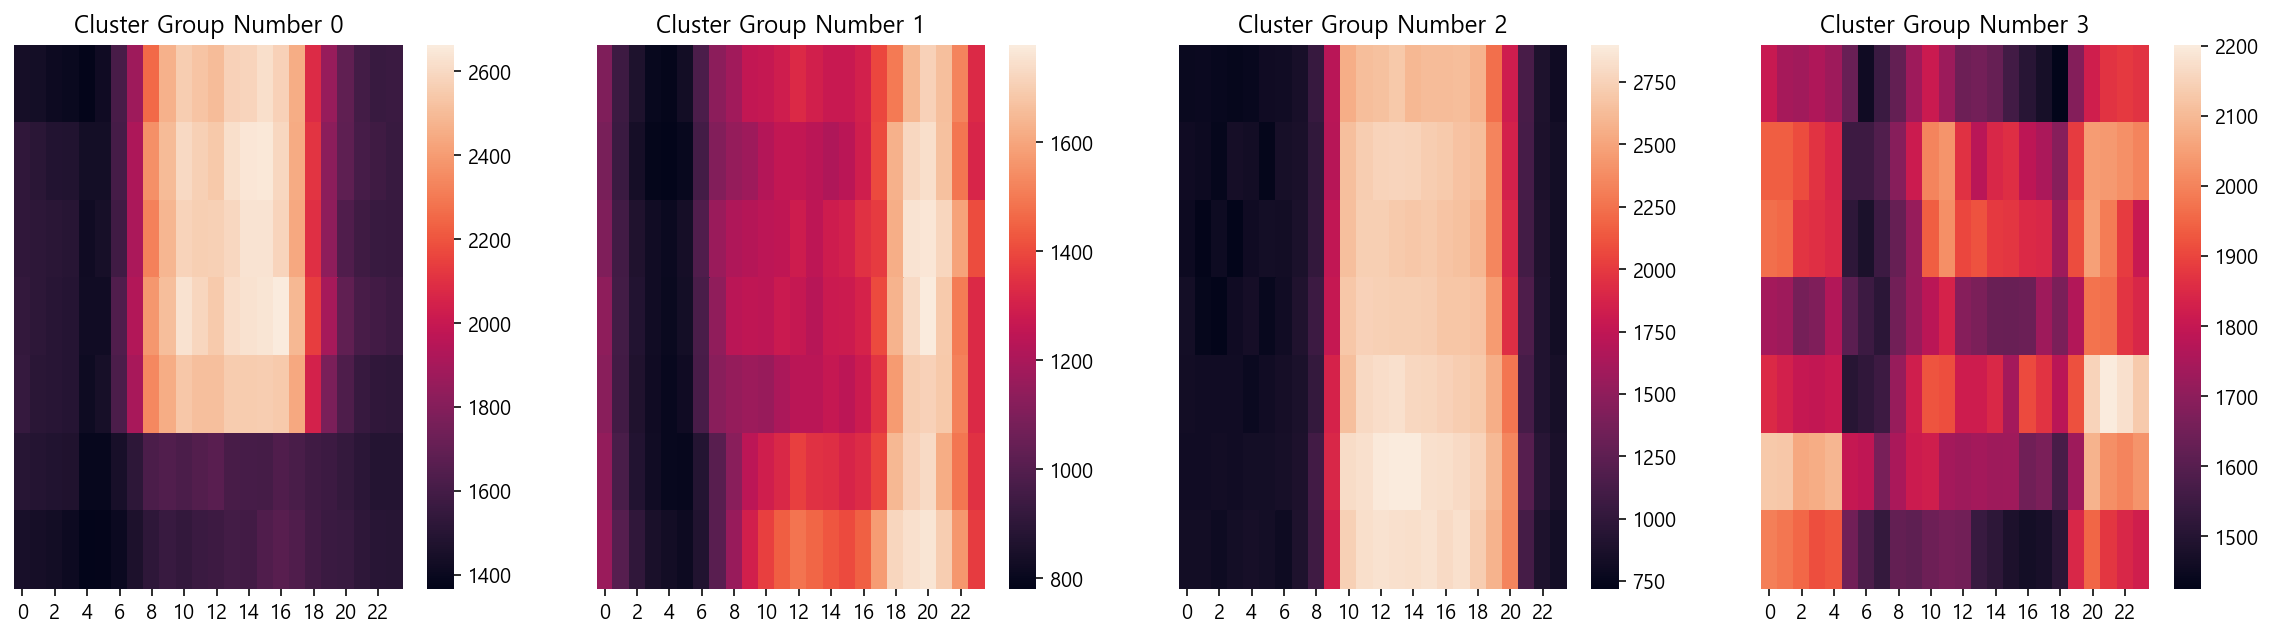

In [37]:
fig = plt.figure(figsize=(20,5))
for k in range(4):
    df = fin_df[fin_df['Cluster_k'] == k]
    df = df.groupby(['weekday','hour'])['전력사용량(kWh)'].median().reset_index().pivot('weekday','hour','전력사용량(kWh)')
    plt.subplot(1,4,k+1)
    sns.heatmap(df)
    plt.title(f'Cluster Group Number {k}')
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks([])

- 위처럼 전력사용량의 특징을 보이는 그룹끼리 묶을 수 있었음
- Cluster 0 : 주중 6-7시부터 서서히 전력을 사용하다가 18시 이후 사용량 감소를 보이고 주말에는 사용량이 적음
- Cluster 1 : 주중, 주말 상관없이 새벽을 제외하고 전력을 사용하며 17시-21시 사이 가장 많은 전력을 사용
- Cluster 2 : 주중 주말 상관없이 8시-21시 까지 전력 사용 건물
- Cluster 3 : 전력 사용량의 무분별함이 보이고 연관을 찾기 어려운 건물

In [38]:
fin_df

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,hour,weekday,date,day,month,weekend,Cluster_k
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,0,0,2020-06-01,1,6,0,0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,1,0,2020-06-01,1,6,0,0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,2,0,2020-06-01,1,6,0,0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,3,0,2020-06-01,1,6,0,0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,4,0,2020-06-01,1,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0,19,0,2020-08-24,24,8,0,2
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0,20,0,2020-08-24,24,8,0,2
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0,21,0,2020-08-24,24,8,0,2
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0,22,0,2020-08-24,24,8,0,2


In [39]:
x_train = fin_df.copy()

In [40]:
test_df['date_time'] = pd.to_datetime(test_df['date_time'])

In [41]:
x_test = test_df.copy()

In [42]:
for i in x_train['num'].unique():
    df = x_train[x_train['num'] == i]
    print('{}번 건물 비전기 {}, 태양광 {}'.format(
        i, df['비전기냉방설비운영'].unique(), df['태양광보유'].unique()))

1번 건물 비전기 [0.], 태양광 [0.]
2번 건물 비전기 [1.], 태양광 [0.]
3번 건물 비전기 [1.], 태양광 [1.]
4번 건물 비전기 [1.], 태양광 [1.]
5번 건물 비전기 [1.], 태양광 [0.]
6번 건물 비전기 [0.], 태양광 [0.]
7번 건물 비전기 [1.], 태양광 [0.]
8번 건물 비전기 [1.], 태양광 [1.]
9번 건물 비전기 [0.], 태양광 [1.]
10번 건물 비전기 [1.], 태양광 [0.]
11번 건물 비전기 [0.], 태양광 [0.]
12번 건물 비전기 [1.], 태양광 [1.]
13번 건물 비전기 [1.], 태양광 [0.]
14번 건물 비전기 [1.], 태양광 [1.]
15번 건물 비전기 [1.], 태양광 [0.]
16번 건물 비전기 [1.], 태양광 [1.]
17번 건물 비전기 [1.], 태양광 [0.]
18번 건물 비전기 [0.], 태양광 [0.]
19번 건물 비전기 [0.], 태양광 [0.]
20번 건물 비전기 [0.], 태양광 [0.]
21번 건물 비전기 [0.], 태양광 [1.]
22번 건물 비전기 [1.], 태양광 [0.]
23번 건물 비전기 [0.], 태양광 [1.]
24번 건물 비전기 [1.], 태양광 [1.]
25번 건물 비전기 [1.], 태양광 [0.]
26번 건물 비전기 [0.], 태양광 [1.]
27번 건물 비전기 [1.], 태양광 [1.]
28번 건물 비전기 [1.], 태양광 [0.]
29번 건물 비전기 [0.], 태양광 [0.]
30번 건물 비전기 [1.], 태양광 [1.]
31번 건물 비전기 [1.], 태양광 [0.]
32번 건물 비전기 [0.], 태양광 [0.]
33번 건물 비전기 [1.], 태양광 [0.]
34번 건물 비전기 [1.], 태양광 [1.]
35번 건물 비전기 [1.], 태양광 [0.]
36번 건물 비전기 [0.], 태양광 [1.]
37번 건물 비전기 [1.], 태양광 [1.]
38번 건물 비전기 [1.], 태양광 [1.]
39번 건물 비전기 [1.], 태양광 

- 건물별 비전기 냉방설비운영과 태양광보유에 해당하는 데이터는 Train 데이터를 통해 알 수 있다.
- 동일하게 변경

In [43]:
for i in x_test['num'].unique():
    df = x_train[x_train['num'] == i]
    a = df.reset_index()['비전기냉방설비운영'][0]
    b = df.reset_index()['태양광보유'][0]
    x_test.loc[(x_test['num']==i), '비전기냉방설비운영'] = a
    x_test.loc[(x_test['num']==i), '태양광보유'] = b

In [44]:
for i in x_test['num'].unique():
    df = x_test[x_test['num'] == i]
    print('{}번 건물 비전기 {}, 태양광 {}'.format(
        i, df['비전기냉방설비운영'].unique(), df['태양광보유'].unique()))

1번 건물 비전기 [0.], 태양광 [0.]
2번 건물 비전기 [1.], 태양광 [0.]
3번 건물 비전기 [1.], 태양광 [1.]
4번 건물 비전기 [1.], 태양광 [1.]
5번 건물 비전기 [1.], 태양광 [0.]
6번 건물 비전기 [0.], 태양광 [0.]
7번 건물 비전기 [1.], 태양광 [0.]
8번 건물 비전기 [1.], 태양광 [1.]
9번 건물 비전기 [0.], 태양광 [1.]
10번 건물 비전기 [1.], 태양광 [0.]
11번 건물 비전기 [0.], 태양광 [0.]
12번 건물 비전기 [1.], 태양광 [1.]
13번 건물 비전기 [1.], 태양광 [0.]
14번 건물 비전기 [1.], 태양광 [1.]
15번 건물 비전기 [1.], 태양광 [0.]
16번 건물 비전기 [1.], 태양광 [1.]
17번 건물 비전기 [1.], 태양광 [0.]
18번 건물 비전기 [0.], 태양광 [0.]
19번 건물 비전기 [0.], 태양광 [0.]
20번 건물 비전기 [0.], 태양광 [0.]
21번 건물 비전기 [0.], 태양광 [1.]
22번 건물 비전기 [1.], 태양광 [0.]
23번 건물 비전기 [0.], 태양광 [1.]
24번 건물 비전기 [1.], 태양광 [1.]
25번 건물 비전기 [1.], 태양광 [0.]
26번 건물 비전기 [0.], 태양광 [1.]
27번 건물 비전기 [1.], 태양광 [1.]
28번 건물 비전기 [1.], 태양광 [0.]
29번 건물 비전기 [0.], 태양광 [0.]
30번 건물 비전기 [1.], 태양광 [1.]
31번 건물 비전기 [1.], 태양광 [0.]
32번 건물 비전기 [0.], 태양광 [0.]
33번 건물 비전기 [1.], 태양광 [0.]
34번 건물 비전기 [1.], 태양광 [1.]
35번 건물 비전기 [1.], 태양광 [0.]
36번 건물 비전기 [0.], 태양광 [1.]
37번 건물 비전기 [1.], 태양광 [1.]
38번 건물 비전기 [1.], 태양광 [1.]
39번 건물 비전기 [1.], 태양광 

In [45]:
x_test = x_test.interpolate()
x_test

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00:00:00,27.800000,1.500000,74.000000,0.0,0.000000,0.0,0.0
1,1,2020-08-25 01:00:00,27.633333,1.366667,75.333333,0.0,0.000000,0.0,0.0
2,1,2020-08-25 02:00:00,27.466667,1.233333,76.666667,0.0,0.000000,0.0,0.0
3,1,2020-08-25 03:00:00,27.300000,1.100000,78.000000,0.0,0.000000,0.0,0.0
4,1,2020-08-25 04:00:00,26.900000,1.166667,79.666667,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19:00:00,28.633333,3.566667,66.000000,0.0,0.533333,1.0,1.0
10076,60,2020-08-31 20:00:00,28.266667,3.833333,67.000000,0.0,0.266667,1.0,1.0
10077,60,2020-08-31 21:00:00,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0
10078,60,2020-08-31 22:00:00,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0


In [46]:
# 결측치 확인
x_test.isnull().sum()

num             0
date_time       0
기온(°C)          0
풍속(m/s)         0
습도(%)           0
강수량(mm, 6시간)    0
일조(hr, 3시간)     0
비전기냉방설비운영       0
태양광보유           0
dtype: int64

In [47]:
x_test['Cluster_k'] = 0
for i in x_test['num'].unique():
    df = x_train[x_train['num'] == i]
    a = df.reset_index()['Cluster_k'][0]
    x_test.loc[(x_test['num']==i), 'Cluster_k'] = a.astype(int)
x_test

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유,Cluster_k
0,1,2020-08-25 00:00:00,27.800000,1.500000,74.000000,0.0,0.000000,0.0,0.0,0
1,1,2020-08-25 01:00:00,27.633333,1.366667,75.333333,0.0,0.000000,0.0,0.0,0
2,1,2020-08-25 02:00:00,27.466667,1.233333,76.666667,0.0,0.000000,0.0,0.0,0
3,1,2020-08-25 03:00:00,27.300000,1.100000,78.000000,0.0,0.000000,0.0,0.0,0
4,1,2020-08-25 04:00:00,26.900000,1.166667,79.666667,0.0,0.000000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19:00:00,28.633333,3.566667,66.000000,0.0,0.533333,1.0,1.0,2
10076,60,2020-08-31 20:00:00,28.266667,3.833333,67.000000,0.0,0.266667,1.0,1.0,2
10077,60,2020-08-31 21:00:00,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0,2
10078,60,2020-08-31 22:00:00,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0,2


In [48]:
x_train

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,hour,weekday,date,day,month,weekend,Cluster_k
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,0,0,2020-06-01,1,6,0,0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,1,0,2020-06-01,1,6,0,0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,2,0,2020-06-01,1,6,0,0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,3,0,2020-06-01,1,6,0,0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,4,0,2020-06-01,1,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0,19,0,2020-08-24,24,8,0,2
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0,20,0,2020-08-24,24,8,0,2
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0,21,0,2020-08-24,24,8,0,2
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0,22,0,2020-08-24,24,8,0,2


In [49]:
# 기계학습을 데이터 셋 형성
x_train_df = x_train.drop(['date_time','hour','weekday','date','day','month','weekend'],axis=1)
# Cluster 별 차이를 주기 위해 One-hot encoding 적용
x_train_df['Cluster_k'] = x_train_df['Cluster_k'].astype('object')
x_train_df = pd.get_dummies(x_train_df)

In [50]:
x_train_df

,num,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,Cluster_k_0,Cluster_k_1,Cluster_k_2,Cluster_k_3
0,1,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,1,0,0,0
1,1,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,1,0,0,0
2,1,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,1,0,0,0
3,1,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,1,0,0,0
4,1,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0,0,0,1,0
122396,60,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0,0,0,1,0
122397,60,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0,0,0,1,0
122398,60,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0,0,0,1,0


In [51]:
x_test_df = x_test.copy()
x_test_df['Cluster_k'] = x_test_df['Cluster_k'].astype('object')
x_test_df = pd.get_dummies(x_test_df)

In [52]:
x_test_df = x_test_df.drop(['date_time'],axis=1)
x_test_df

,num,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유,Cluster_k_0,Cluster_k_1,Cluster_k_2,Cluster_k_3
0,1,27.800000,1.500000,74.000000,0.0,0.000000,0.0,0.0,1,0,0,0
1,1,27.633333,1.366667,75.333333,0.0,0.000000,0.0,0.0,1,0,0,0
2,1,27.466667,1.233333,76.666667,0.0,0.000000,0.0,0.0,1,0,0,0
3,1,27.300000,1.100000,78.000000,0.0,0.000000,0.0,0.0,1,0,0,0
4,1,26.900000,1.166667,79.666667,0.0,0.000000,0.0,0.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10075,60,28.633333,3.566667,66.000000,0.0,0.533333,1.0,1.0,0,0,1,0
10076,60,28.266667,3.833333,67.000000,0.0,0.266667,1.0,1.0,0,0,1,0
10077,60,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0,0,0,1,0
10078,60,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0,0,0,1,0


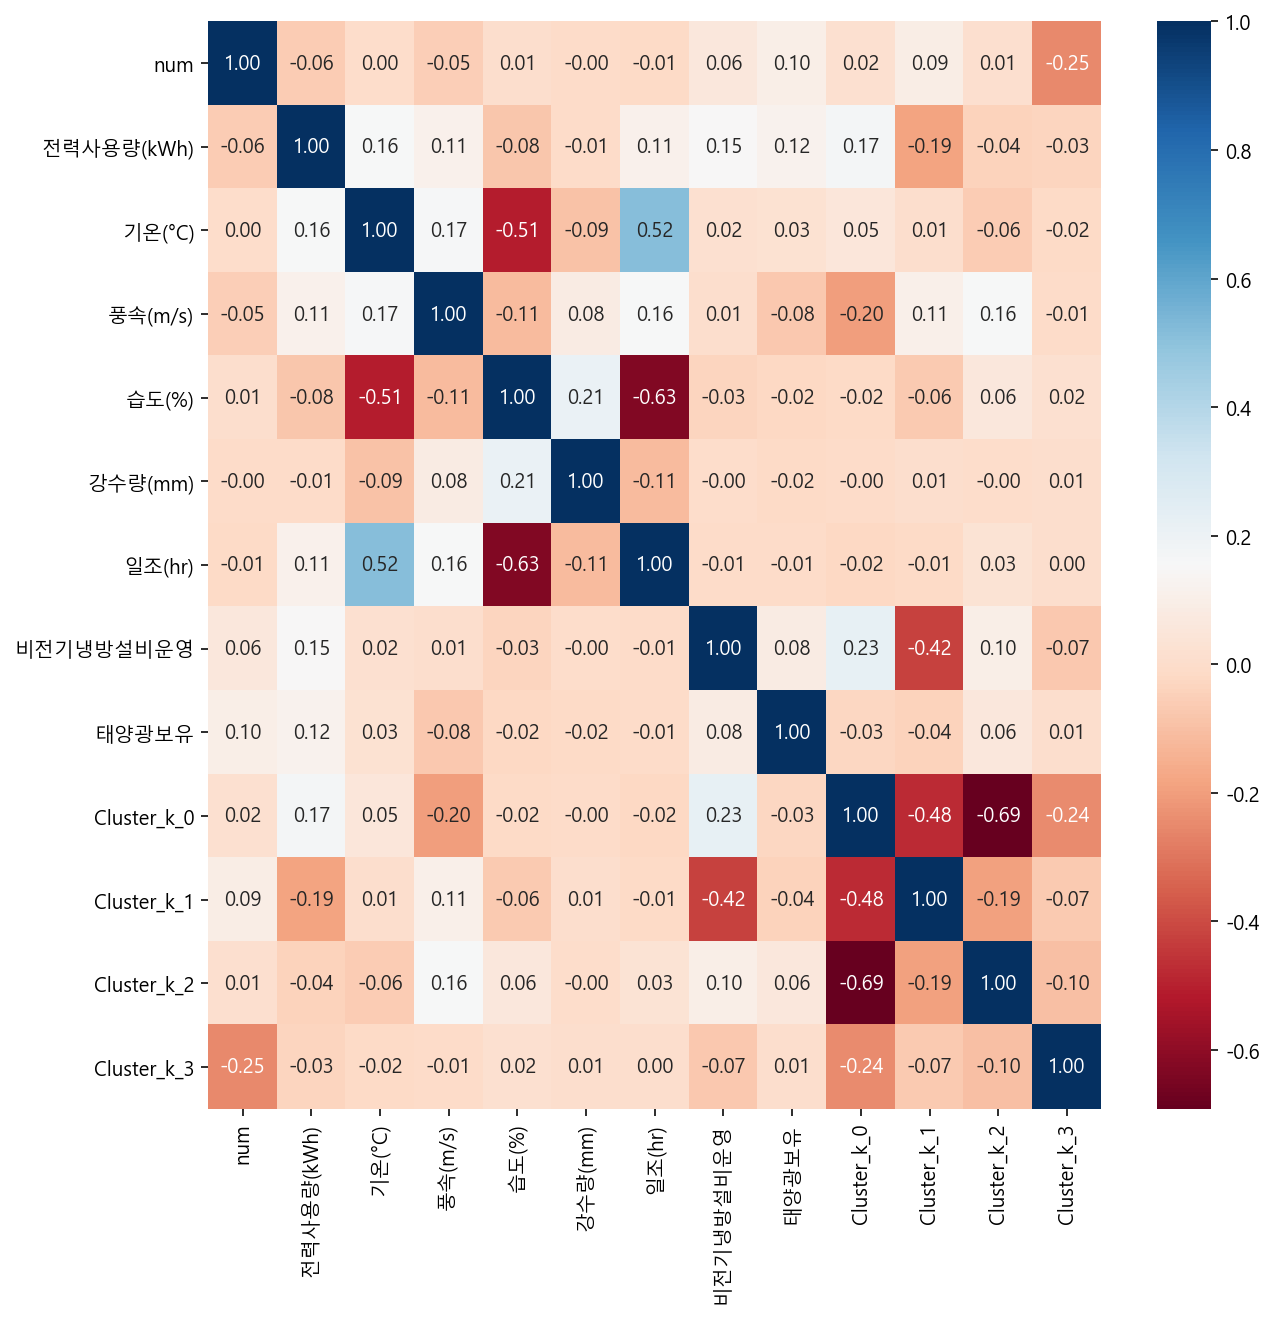

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(x_train_df.corr(),fmt=".2f", annot=True, cmap="RdBu")
plt.show()

- 상관관계 확인 결과 전력사용량에 큰 영향을 주는 변수는 존재하지 않았다
- Cluster0 <-> Cluster2사이에 음의 상관성을 보였고 기온,습도,일조 사이에 상관성을 확인할 수 있었다.
    -> 이를 통해 파생변수를 생성하여 더 좋은 결과가 나타날 수도 있음

#### 이상치 판단
- 기상의 경우 이상기온은 존재할 수 있고 이때 발생하는 전기사용량이 통계적으로 이상치일 수 있으나 제거하지 않도록 결정함.

#### 학습/검증 셋 나누기

In [54]:
x_train_df

,num,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,Cluster_k_0,Cluster_k_1,Cluster_k_2,Cluster_k_3
0,1,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,1,0,0,0
1,1,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,1,0,0,0
2,1,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,1,0,0,0
3,1,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,1,0,0,0
4,1,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0,0,0,1,0
122396,60,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0,0,0,1,0
122397,60,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0,0,0,1,0
122398,60,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0,0,0,1,0


In [55]:
train_x = x_train_df.drop(['전력사용량(kWh)'],axis=1)
train_y = x_train_df['전력사용량(kWh)']
test_x = x_test_df
train_x.shape, train_y.shape, test_x.shape

((122400, 12), (122400,), (10080, 12))

In [56]:
test_x = test_x.rename(columns = {'강수량(mm, 6시간)' : '강수량(mm)',
                              '일조(hr, 3시간)' : '일조(hr)'})
test_x

,num,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,Cluster_k_0,Cluster_k_1,Cluster_k_2,Cluster_k_3
0,1,27.800000,1.500000,74.000000,0.0,0.000000,0.0,0.0,1,0,0,0
1,1,27.633333,1.366667,75.333333,0.0,0.000000,0.0,0.0,1,0,0,0
2,1,27.466667,1.233333,76.666667,0.0,0.000000,0.0,0.0,1,0,0,0
3,1,27.300000,1.100000,78.000000,0.0,0.000000,0.0,0.0,1,0,0,0
4,1,26.900000,1.166667,79.666667,0.0,0.000000,0.0,0.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10075,60,28.633333,3.566667,66.000000,0.0,0.533333,1.0,1.0,0,0,1,0
10076,60,28.266667,3.833333,67.000000,0.0,0.266667,1.0,1.0,0,0,1,0
10077,60,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0,0,0,1,0
10078,60,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0,0,0,1,0


In [57]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [58]:
train_x_scale = mm.fit_transform(train_x)
train_x_scale = pd.DataFrame(train_x_scale, columns = train_x.columns)
train_x_scale

,num,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,Cluster_k_0,Cluster_k_1,Cluster_k_2,Cluster_k_3
0,0.0,0.257937,0.124378,0.901235,0.009816,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.261905,0.144279,0.888889,0.003681,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.253968,0.159204,0.888889,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.238095,0.159204,0.888889,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.234127,0.164179,0.901235,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
122395,1.0,0.662698,0.114428,0.604938,0.000000,0.7,1.0,1.0,0.0,0.0,1.0,0.0
122396,1.0,0.642857,0.059701,0.641975,0.000000,0.0,1.0,1.0,0.0,0.0,1.0,0.0
122397,1.0,0.642857,0.089552,0.641975,0.000000,0.0,1.0,1.0,0.0,0.0,1.0,0.0
122398,1.0,0.634921,0.089552,0.679012,0.000000,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [59]:
test_x_scale = mm.transform(test_x)
test_x_scale = pd.DataFrame(test_x_scale, columns = test_x.columns)
test_x_scale

,num,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,Cluster_k_0,Cluster_k_1,Cluster_k_2,Cluster_k_3
0,0.0,0.662698,0.074627,0.679012,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.656085,0.067993,0.695473,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.649471,0.061360,0.711934,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.642857,0.054726,0.728395,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.626984,0.058043,0.748971,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10075,1.0,0.695767,0.177446,0.580247,0.0,0.533333,1.0,1.0,0.0,0.0,1.0,0.0
10076,1.0,0.681217,0.190713,0.592593,0.0,0.266667,1.0,1.0,0.0,0.0,1.0,0.0
10077,1.0,0.666667,0.203980,0.604938,0.0,0.000000,1.0,1.0,0.0,0.0,1.0,0.0
10078,1.0,0.666667,0.203980,0.604938,0.0,0.000000,1.0,1.0,0.0,0.0,1.0,0.0


#### Modeling
- MachineLearning
- DeepLearning

https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard#Modelling

https://www.kaggle.com/dimitreoliveira/model-stacking-feature-engineering-and-eda

In [60]:
### MachineLearning
#### Library
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet, Lasso, Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
import xgboost
from sklearn.metrics import r2_score, mean_squared_error

https://wooono.tistory.com/204

In [62]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.model_selection import StratifiedKFold

n_splits = 5
sfk = StratifiedKFold(n_splits = n_splits)

y_pred = np.zeros(len(test_x_scale))

In [61]:
# MAPE 값 가져오기
def symmetric_mean_absolute_percentage_error(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean((np.abs(y_test - y_pred)) / (np.abs(y_test) + np.abs(y_pred))) * 100

def custom_scoring(y_test, y_pred):

    smape = symmetric_mean_absolute_percentage_error(y_test, y_pred)

    return smape

In [63]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

In [64]:
# LinearRegression
def Linear(x_train, x_test, y_train):
    Linear = LinearRegression()
    Linear.fit(x_train,y_train)
    lin_pred = Linear.predict(x_test)
    lin_r2 = Linear.score(x_train,y_train)
    lin_scores = cross_val_score(Linear, x_train, y_train, cv = k_fold, n_jobs = 1, scoring = make_scorer(custom_scoring))
    cv_mean = np.round(np.mean(lin_scores),4)
    cv_std = np.round(np.std(lin_scores),4)
    print("Linear R^2 : {} / MAPE 평균값 : {}/ 편차 : {}".format(lin_r2,cv_mean,cv_std))

    return (lin_r2, cv_mean,cv_std, lin_pred)

In [157]:
Linear_r2, Linear_smape, Linear_std, Linear_pred = Linear(train_x_scale, test_x_scale, train_y)

Linear R^2 : 0.10662543690223991 / MAPE 평균값 : 26.9532/ 편차 : 0.0826


In [65]:
# DecisionTreeRegressor
def DecisionTree(x_train,x_test,y_train):
    De = DecisionTreeRegressor()
    De.fit(x_train,y_train)
    De_pred = De.predict(x_test)
    De_r2 = De.score(x_train,y_train)
    De_scores = cross_val_score(De, x_train, y_train, cv=k_fold, n_jobs= 1, scoring = make_scorer(custom_scoring))
    cv_mean = De_scores.mean()
    cv_std = De_scores.std()
    print('Decision Tree R^2 : {} / MAPE값 : {}/편차 : {}'.format(De_r2,cv_mean,cv_std))
    return (De_r2, cv_mean, cv_std, De_pred)

In [161]:
Decision_r2, Decision_smape,Decision_std, Decision_pred = DecisionTree(train_x_scale, test_x_scale, train_y)

Decision Tree R^2 : 0.9993344382509932 / MAPE값 : 11.517698189428659/편차 : 0.055378747749430184


In [66]:
# RandomForestRegressor
def RandomForest(x_train, x_test, y_train):
    RF = RandomForestRegressor()
    RF.fit(x_train, y_train)
    RF_pred = RF.predict(x_test)
    RF_r2 = RF.score(x_train,y_train)
    RF_scores = cross_val_score(RF, x_train, y_train, cv=k_fold, n_jobs =1 , scoring = make_scorer(custom_scoring))
    cv_mean = RF_scores.mean()
    cv_std = RF_scores.std()
    print('RandomForest R^2 : {} / MAPE값 : {}/편차 : {}'.format(RF_r2,cv_mean,cv_std))
    return (RF_r2, cv_mean, cv_std, RF_pred)

In [169]:
RF_r2, RF_smape,RF_std, RF_pred = RandomForest(train_x_scale, test_x_scale, train_y)

RandomForest R^2 : 0.9816797236010912 / MAPE값 : 9.843387920397282/편차 : 0.08828565692214294


In [67]:
# Xgboost
def Xgboost(x_train,x_test,y_train):
    xgb = xgboost.XGBRegressor()
    xgb.fit(x_train,y_train)
    xgb_pred = xgb.predict(x_test)
    xgb_r2 = xgb.score(x_train,y_train)
    xgb_scores = cross_val_score(xgb, x_train, y_train, cv=k_fold, n_jobs =1 , scoring = make_scorer(custom_scoring))
    cv_mean = xgb_scores.mean()
    cv_std = xgb_scores.std()
    print('XGboost R^2 : {} / MAPE값 : {}/편차 : {}'.format(xgb_r2,cv_mean,cv_std))
    return (xgb_r2, cv_mean, cv_std, xgb_pred)

In [168]:
xgb_r2, xgb_smape,xgb_std, xgb_pred = Xgboost(train_x_scale, test_x_scale, train_y)

XGboost R^2 : 0.8893382798319244 / MAPE값 : 10.620393876993905/편차 : 0.1200520564255849


In [68]:
def Lgboost(x_train,x_test,y_train):
    lgbm = lgb.LGBMRegressor()
    lgbm.fit(x_train,y_train)
    lgbm_pred = lgbm.predict(x_test)
    lgbm_r2 = lgbm.score(x_train, y_train)
    lgbm_scores = cross_val_score(lgbm, x_train, y_train, cv = k_fold, n_jobs = 1, scoring = make_scorer(custom_scoring))
    cv_mean = lgbm_scores.mean()
    cv_std = lgbm_scores.std()
    print('LGBM R^2 : {} / MAPE값 : {}/편차 : {}'.format(lgbm_r2, cv_mean, cv_std))
    return (lgbm_r2, cv_mean, cv_std, lgbm_pred)

In [167]:
lgbm_r2, lgbm_smape,lgbm_std, lgbm_pred = Lgboost(train_x_scale, test_x_scale, train_y)

LGBM R^2 : 0.8759346964419675 / MAPE값 : 11.378248738411644/편차 : 0.13187225405981925


In [174]:
model_evaluation = pd.DataFrame(columns = ['R^2_Score','SMAPE','MAPE_std'])

In [175]:
model_evaluation['R^2_Score'] = [Linear_r2,Decision_r2,RF_r2,xgb_r2,lgbm_r2]
model_evaluation['SMAPE'] = [Linear_smape,Decision_smape,RF_smape,xgb_smape,lgbm_smape]
model_evaluation['MAPE_std'] = [Linear_std,Decision_std,RF_std,xgb_std,lgbm_std]
model_evaluation.index = ['Linear', 'DecisionTree', 'RandomForest', 'XGBoost', 'LGBM']

In [176]:
model_evaluation

,R^2_Score,SMAPE,MAPE_std
Linear,0.106625,26.953200,0.082600
DecisionTree,0.999334,11.517698,0.055379
RandomForest,0.981680,9.843388,0.088286
XGBoost,0.889338,10.620394,0.120052
LGBM,0.875935,11.378249,0.131872


- RandomForest가 설명력이 좋고 SMAPE 평균 및 편차 면에서 좋은 결과를 보여준다고  판단됨.

In [ ]:
# 앙상블 모델 
## DT + RF + Xgb
Decision_pred
RF_pred
xgb_pred

In [271]:
Ensem_pred_1 = RF_pred*0.5 + Decision_pred*0.3 +xgb_pred*0.2
Ensem_pred_2 = RF_pred*0.4 + Decision_pred*0.4 +xgb_pred*0.3
Ensem_pred_3 = RF_pred*0.35 + Decision_pred*0.35 +xgb_pred*0.3
Ensem_pred_4 = RF_pred*0.34 + Decision_pred*0.33 +xgb_pred*0.33

In [281]:
RF_pred

array([8691.44256, 8680.89312, 8679.06576, ..., 3987.25632, 3987.25632,
       3987.25632])

In [280]:
Ensem_pred_1

array([8671.21653918, 8647.96154809, 8634.0280382 , ..., 4048.35785688,
       4048.35785688, 4048.35785688])

In [282]:
Ensem_pred_2

array([9529.55825173, 9501.47871323, 9481.80116337, ..., 4465.33867331,
       4465.33867331, 4465.33867331])

In [283]:
Ensem_pred_3

array([8659.72452373, 8635.28285723, 8616.27987537, ..., 4054.31745731,
       4054.31745731, 4054.31745731])

In [284]:
Ensem_pred_4

array([8655.79432532, 8632.80460814, 8612.62495723, ..., 4047.49845306,
       4047.49845306, 4047.49845306])

In [278]:
s_df['answer'] = Ensem_pred_4

In [279]:
s_df.to_csv("./전력예측값_박주혁_v07.csv", index=False)

In [125]:
# 딥러닝 라이브러리
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Reshape, GRU, RNN, Dropout, MaxPool1D, MaxPooling1D, Conv1D, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback

In [73]:
def SMAPE(y_test, y_pred):
    return np.mean((np.abs(y_test - y_pred)) / (np.abs(y_test) + np.abs(y_pred))) * 100

In [286]:
input_window =512 #임의의 수
output_window = 24 #168 7일 24시간
window = 12 #window는 12시간 마다는 12시간 마다
num_features = 12 #베이스라인은 feature를 하나만 사용했습니다.
num_power = 60
end_=168
lstm_units=32
dropout=0.2
EPOCH=30
BATCH_SIZE=128

In [150]:
dn_x_train = mm.fit_transform(train_x)
dn_x_test = mm.fit_transform(test_x)

In [151]:
d_x_train = dn_x_train.reshape(-1, 10, train_x.shape[1])
d_x_test = dn_x_test.reshape(-1, 10, train_x.shape[1])
d_x_train.shape, d_x_test.shape

((12240, 10, 12), (1008, 10, 12))

In [153]:
d_x_train = dn_x_train.reshape(dn_x_train.shape[0], dn_x_train.shape[1],1)
d_x_test = dn_x_test.reshape(dn_x_test.shape[0], dn_x_test.shape[1],1)
d_x_train.shape, d_x_test.shape

((122400, 12, 1), (10080, 12, 1))

Epoch 1/100
1530/1530 [==============================] - 20s 10ms/step - loss: 15049731.0000 - val_loss: 99.8619
Epoch 2/100
1530/1530 [==============================] - 14s 9ms/step - loss: 40620.4453 - val_loss: 99.9182
Epoch 3/100
1530/1530 [==============================] - -224s -146768us/step - loss: 36347.6953 - val_loss: 100.0091
Epoch 4/100
1530/1530 [==============================] - 15s 10ms/step - loss: 26659.5879 - val_loss: 100.0456
Epoch 5/100
1530/1530 [==============================] - 256s 167ms/step - loss: 35338.8750 - val_loss: 99.9582
Epoch 6/100
1530/1530 [==============================] - 14s 9ms/step - loss: 33004.1445 - val_loss: 100.0356
Epoch 7/100
1530/1530 [==============================] - 16s 11ms/step - loss: 20812.9199 - val_loss: 99.9847
Epoch 8/100
1530/1530 [==============================] - 15s 9ms/step - loss: 17978.7500 - val_loss: 54.6493
Epoch 9/100
1530/1530 [==============================] - 15s 10ms/step - loss: 37326720.0000 - val_loss: 100

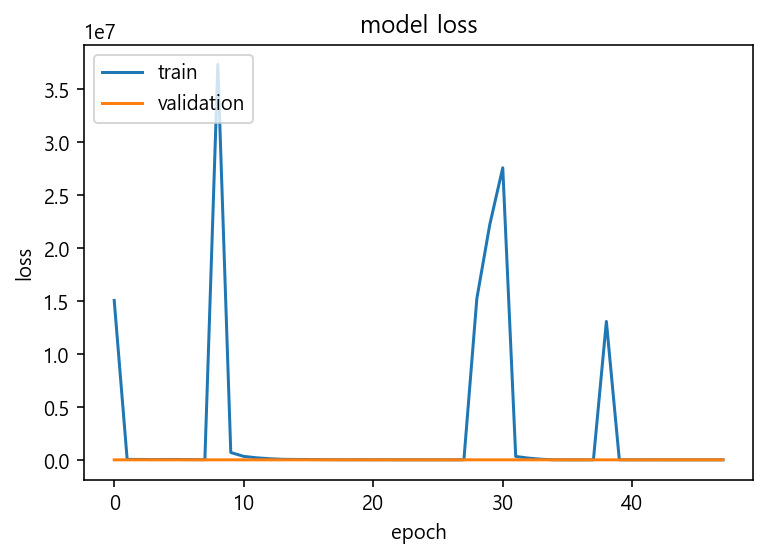

In [154]:
model = Sequential()
model.add(LSTM(100, input_shape = (d_x_train.shape[1],1), activation = 'relu'))
#model.add(Dense(256))
#model.add(Dropout(0.1))
model.add(Dense(128))
model.add(Dropout(0.1))
#model.add(Dense(64))
#model.add(Dropout(0.1))
model.add(Dense(32))
model.add(Dropout(0.1))
#model.add(Dense(16))
#model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_absolute_percentage_error')

early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1)

history = model.fit(d_x_train,train_y, epochs =100, batch_size=64, verbose=1, validation_split=0.2,callbacks=[early_stop])

h2 = plt.plot(history.history['loss'])
h2 = plt.plot(history.history['val_loss'])
h2 = plt.title("model loss")
h2 = plt.ylabel('loss')
h2 = plt.xlabel('epoch')
h2 = plt.legend(['train','validation'], loc='upper left')
plt.show()

lstm_pred = model.predict(d_x_test)

In [ ]:
c_x_train = dn_x_train.reshape(-1,dn_x_train.shape[1],1)
c_x_test = dn_x_test.reshape(-1,dn_x_test.shape[1],1)

mod = Sequential()
mod.add(Conv1D(100,kernel_size= 2,input_shape=(dn_x_train.shape[1],1), activation='relu'))
mod.add(MaxPooling1D(pool_size=2))
mod.add(Flatten())
mod.add(Dense(128))
mod.add(Dropout(0.1))

mod.add(Dense(64))
mod.add(Dropout(0.1))

mod.add(Dense(1))

mod.compile(optimizer='adam', loss='mean_absolute_percentage_error')
early_stop = EarlyStopping(monitor='loss', patience = 10, verbose=1)
history = mod.fit(c_x_train, train_y, epochs=100, verbose=1, validation_split=0.2, callbacks=[early_stop])

h2 = plt.plot(history.history['loss'])
h2 = plt.plot(history.history['val_loss'])
h2 = plt.title("model loss")
h2 = plt.ylabel('loss')
h2 = plt.xlabel('epoch')
h2 = plt.legend(['train','validation'], loc='upper left')
plt.show()

cnn_pred = mod.predict(c_x_test)

Epoch 1/100
3060/3060 [==============================] - 7s 2ms/step - loss: 28716774.0000 - val_loss: 90.5019
Epoch 2/100
3060/3060 [==============================] - 6s 2ms/step - loss: 1330367.8750 - val_loss: 100.2417
Epoch 3/100
3060/3060 [==============================] - 6s 2ms/step - loss: 223017.6406 - val_loss: 99.7441
Epoch 4/100
3060/3060 [==============================] - 6s 2ms/step - loss: 223105.0938 - val_loss: 100.0017
Epoch 5/100
3060/3060 [==============================] - 7s 2ms/step - loss: 163065.9062 - val_loss: 99.8003
Epoch 6/100
3060/3060 [==============================] - 6s 2ms/step - loss: 175697.0625 - val_loss: 100.2014
Epoch 7/100
3060/3060 [==============================] - 5s 2ms/step - loss: 134907.5938 - val_loss: 99.8366
Epoch 8/100
3060/3060 [==============================] - 6s 2ms/step - loss: 96658.1016 - val_loss: 100.0221
Epoch 9/100
3060/3060 [==============================] - 5s 2ms/step - loss: 75913.6094 - val_loss: 99.8096
Epoch 10/100
3

In [148]:
train_x

,num,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,Cluster_k_0,Cluster_k_1,Cluster_k_2,Cluster_k_3
0,1,17.6,2.5,92.0,0.8,0.0,0.0,0.0,1,0,0,0
1,1,17.7,2.9,91.0,0.3,0.0,0.0,0.0,1,0,0,0
2,1,17.5,3.2,91.0,0.0,0.0,0.0,0.0,1,0,0,0
3,1,17.1,3.2,91.0,0.0,0.0,0.0,0.0,1,0,0,0
4,1,17.0,3.3,92.0,0.0,0.0,0.0,0.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,27.8,2.3,68.0,0.0,0.7,1.0,1.0,0,0,1,0
122396,60,27.3,1.2,71.0,0.0,0.0,1.0,1.0,0,0,1,0
122397,60,27.3,1.8,71.0,0.0,0.0,1.0,1.0,0,0,1,0
122398,60,27.1,1.8,74.0,0.0,0.0,1.0,1.0,0,0,1,0


In [147]:
test_x

,num,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,Cluster_k_0,Cluster_k_1,Cluster_k_2,Cluster_k_3
0,1,27.800000,1.500000,74.000000,0.0,0.000000,0.0,0.0,1,0,0,0
1,1,27.633333,1.366667,75.333333,0.0,0.000000,0.0,0.0,1,0,0,0
2,1,27.466667,1.233333,76.666667,0.0,0.000000,0.0,0.0,1,0,0,0
3,1,27.300000,1.100000,78.000000,0.0,0.000000,0.0,0.0,1,0,0,0
4,1,26.900000,1.166667,79.666667,0.0,0.000000,0.0,0.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10075,60,28.633333,3.566667,66.000000,0.0,0.533333,1.0,1.0,0,0,1,0
10076,60,28.266667,3.833333,67.000000,0.0,0.266667,1.0,1.0,0,0,1,0
10077,60,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0,0,0,1,0
10078,60,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0,0,0,1,0


In [145]:
c_x_test

array([[[ 1.        ],
        [27.8       ],
        [ 1.5       ],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 1.        ],
        [27.63333333],
        [ 1.36666667],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 1.        ],
        [27.46666667],
        [ 1.23333333],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       ...,

       [[60.        ],
        [27.9       ],
        [ 4.1       ],
        ...,
        [ 0.        ],
        [ 1.        ],
        [ 0.        ]],

       [[60.        ],
        [27.9       ],
        [ 4.1       ],
        ...,
        [ 0.        ],
        [ 1.        ],
        [ 0.        ]],

       [[60.        ],
        [27.9       ],
        [ 4.1       ],
        ...,
        [ 0.        ],
        [ 1.        ],
        [ 0.        ]]])

In [144]:
cnn_pred

array([[-0.00028014],
       [-0.00028014],
       [-0.00028014],
       ...,
       [-0.00028014],
       [-0.00028014],
       [-0.00028014]], dtype=float32)

In [ ]:
s_df['answer'] = cnn_pred

#### 더 좋은 결과를 위한 파생변수 생성

In [205]:
eda_df = x_train_df.copy()

In [207]:
eda_df.describe()

,num,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,Cluster_k_0,Cluster_k_1,Cluster_k_2,Cluster_k_3
count,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000
mean,30.500000,2324.875915,24.251713,2.151641,80.169848,0.514989,0.213533,0.683333,0.483333,0.633333,0.116667,0.216667,0.033333
std,17.318173,2059.022327,3.407902,1.514475,15.525862,2.624505,0.370517,0.465178,0.499724,0.481896,0.321024,0.411975,0.179506
min,1.000000,0.000000,11.100000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.750000,1055.268000,21.800000,1.100000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.500000,1700.352000,24.200000,1.900000,84.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,45.250000,2780.571375,26.500000,2.900000,93.000000,0.000000,0.300000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,60.000000,17739.225000,36.300000,20.100000,100.000000,81.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
eda_df['불쾌지수'] = 9/5*eda_df['기온(°C)'] - 0.55*(1-eda_df['습도(%)'])(9/5*eda_df['기온(°C)']-26)+32
eda_df['체감온도'] = 13.127+0.6215*eda_df['기온(°C)']-13.947*eda_df['풍속(m/s)']^(0.16)+0.3965*eda_df['풍속(m/s)']^(0.16)*eda_df['기온(°C)']

In [ ]:
eda_test = test_x.copy()
eda_test['불쾌지수'] = 9/5*eda_test['기온(°C)'] - 0.55*(1-eda_test['습도(%)'])(9/5*eda_test['기온(°C)']-26)+32
eda_test['체감온도'] = 13.127+0.6215*eda_test['기온(°C)']-13.947*eda_test['풍속(m/s)']^(0.16)+0.3965*eda_test['풍속(m/s)']^(0.16)*eda_test['기온(°C)']

In [ ]:
x_train_eda = eda_df.drop(['전력사용량(kWh)'],axis=1)
y_train_eda = eda_df['전력사용량(kWh)']
x_test_eda = eda_test

In [ ]:
Linear_r2, Linear_smape, Linear_std, Linear_pred = Linear(train_x_scale, test_x_scale, train_y)

In [ ]:
Decision_r2, Decision_smape,Decision_std, Decision_pred = DecisionTree(train_x_scale, test_x_scale, train_y)

In [ ]:
RF_r2, RF_smape,RF_std, RF_pred = RandomForest(train_x_scale, test_x_scale, train_y)

In [ ]:
xgb_r2, xgb_smape,xgb_std, xgb_pred = Xgboost(train_x_scale, test_x_scale, train_y)

<AxesSubplot:>

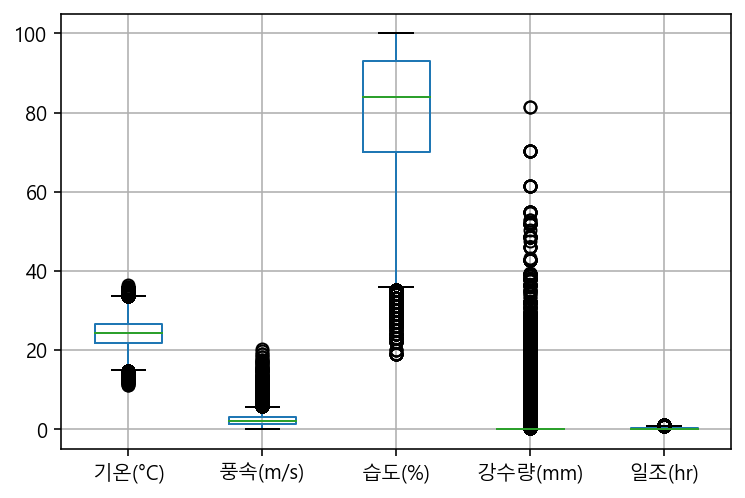

In [208]:
eda_df[['기온(°C)','풍속(m/s)','습도(%)','강수량(mm)','일조(hr)']].boxplot()

- 강수량의 경우 IQR기준으로 이상치를 제거할 경우 강수량이 있는날이 모두 제거되므로 이상치제거하지 않고 진행

In [209]:
def delete_outliers(df,feature):
    Q1 = np.percentile(df[feature],25)
    Q3 = np.percentile(df[feature],75)
    IQR = Q3-Q1
    
    outlier_range = 1.5*IQR
    
    df = df[(df[feature]<=Q3+IQR)&(df[feature]>=Q1-IQR)]
    return df

In [258]:
eda_df = delete_outliers(eda_df,'기온(°C)')
eda_df = delete_outliers(eda_df,'풍속(m/s)')
eda_df = delete_outliers(eda_df,'습도(%)')
eda_df = delete_outliers(eda_df,'일조(hr)')
eda_df = delete_outliers(eda_df,'강수량(mm)')

In [259]:
eda_df = eda_df.reset_index()
eda_df.describe()

,index,num,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,Cluster_k_0,Cluster_k_1,Cluster_k_2,Cluster_k_3
count,57565.000000,57565.000000,57565.000000,57565.00000,57565.000000,57565.000000,57565.0,57565.0,57565.000000,57565.000000,57565.000000,57565.000000,57565.000000,57565.000000
mean,42110.929940,30.790289,2082.098706,23.15955,1.603337,85.706461,0.0,0.0,0.679684,0.487397,0.657952,0.111995,0.199062,0.030991
std,24233.812848,17.273692,1873.270407,2.62031,0.995821,9.383411,0.0,0.0,0.466602,0.499845,0.474400,0.315363,0.399298,0.173295
min,2.000000,1.000000,155.520000,17.10000,0.000000,63.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21091.000000,16.000000,936.360000,21.20000,0.800000,79.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41999.000000,31.000000,1507.680000,23.10000,1.500000,87.000000,0.0,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,62943.000000,46.000000,2513.808000,25.20000,2.300000,93.000000,0.0,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,84192.000000,60.000000,16864.056000,29.40000,4.100000,100.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [260]:
eda_df = eda_df.drop(['index'],axis=1)

In [261]:
eda_df

,num,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,Cluster_k_0,Cluster_k_1,Cluster_k_2,Cluster_k_3
0,1,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,1,0,0,0
1,1,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,1,0,0,0
2,1,7945.128,17.2,2.0,68.0,0.0,0.0,0.0,0.0,1,0,0,0
3,1,7973.640,17.3,2.5,65.0,0.0,0.0,0.0,0.0,1,0,0,0
4,1,7989.840,17.5,2.6,70.0,0.0,0.0,0.0,0.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57560,60,3104.352,24.1,0.6,86.0,0.0,0.0,1.0,1.0,0,0,1,0
57561,60,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0,0,0,1,0
57562,60,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0,0,0,1,0
57563,60,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0,0,0,1,0


In [262]:
x_train_eda = eda_df.drop(['전력사용량(kWh)'],axis=1)
y_train_eda = eda_df['전력사용량(kWh)']

In [263]:
x_train_eda_scale = mm.fit_transform(x_train_eda)
x_test_eda_scale = mm.transform(test_x)

In [264]:
x_train_eda_scale.shape, x_test_eda_scale.shape, y_train_eda.shape

((57565, 12), (10080, 12), (57565,))

In [265]:
RF_eda_r2, RF_eda_smape,RF_eda_std, RF_eda_pred = RandomForest(x_train_eda_scale, x_test_eda_scale, y_train_eda)

RandomForest R^2 : 0.978967172569596 / MAPE값 : 9.964480302903178/편차 : 0.052865065451341654


In [224]:
RF_pred

array([8691.44256, 8680.89312, 8679.06576, ..., 3987.25632, 3987.25632,
       3987.25632])

In [225]:
test_df

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00:00:00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03:00:00,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10076,60,2020-08-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10077,60,2020-08-31 21:00:00,27.9,4.1,68.0,NaN,0.0,1.0,1.0
10078,60,2020-08-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [238]:
a = []
for i in range(test_df.shape[0]):
    aa = str(test_df['num'][i])+ " " + str(test_df['date_time'][i])
    a.append(aa)

In [239]:
test_df['num_date_time'] = a

In [240]:
test_df['answer'] = RF_pred

In [249]:
test_df['date_time'] = pd.to_datetime(test_df['date_time'],format = '%Y%m%d %hh')

In [250]:
test_df

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유,num_date_time,전력사용예측값,answer
0,1,2020-08-25 00:00:00,27.8,1.5,74.0,0.0,0.0,NaN,NaN,1 2020-08-25 00:00:00,8691.44256,8691.44256
1,1,2020-08-25 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 2020-08-25 01:00:00,8680.89312,8680.89312
2,1,2020-08-25 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 2020-08-25 02:00:00,8679.06576,8679.06576
3,1,2020-08-25 03:00:00,27.3,1.1,78.0,NaN,0.0,NaN,NaN,1 2020-08-25 03:00:00,8669.45592,8669.45592
4,1,2020-08-25 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 2020-08-25 04:00:00,8666.19000,8666.19000
...,...,...,...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60 2020-08-31 19:00:00,3915.02160,3915.02160
10076,60,2020-08-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60 2020-08-31 20:00:00,3930.94512,3930.94512
10077,60,2020-08-31 21:00:00,27.9,4.1,68.0,NaN,0.0,1.0,1.0,60 2020-08-31 21:00:00,3987.25632,3987.25632
10078,60,2020-08-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60 2020-08-31 22:00:00,3987.25632,3987.25632


In [266]:
s_df['answer'] = RF_eda_pred

In [267]:
s_df.to_csv("./전력예측값_박주혁_v03.csv", index=False)